# Amazon Fine Food Reviews Analysis


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews <br>

EDA: https://nycdatascience.com/blog/student-works/amazon-fine-foods-visualization/


The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (rating of 4 or 5) or negative (rating of 1 or 2).

<br>
[Q] How to determine if a review is positive or negative?<br>
<br> 
[Ans] We could use Score/Rating. A rating of 4 or 5 can be cosnidered as a positive review. A rating of 1 or 2 can be considered as negative one. A review of rating 3 is considered nuetral and such reviews are ignored from our analysis. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.




# Logistic Regression Algorithm

<ol>
    <li><strong>Apply Logistic Regression on these feature sets</strong>
        <ul>
            <li><font color='red'>SET 1:</font>Review text, preprocessed one converted into vectors using (BOW)</li>
            <li><font color='red'>SET 2:</font>Review text, preprocessed one converted into vectors using (TFIDF)</li>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Pertubation Test</strong>
        <ul>
    <li>Get the weights W after fit your model with the data X i.e Train data.</li>
    <li>Add a noise to the X (X' = X + e) and get the new data set X' (if X is a sparse
matrix, X.data+=e)</li>
    <li>Fit the model again on data X' and get the weights W'</li>
    <li>Add a small eps value(to eliminate the divisible by zero error) to W and W’ i.e
W=W+10^-6 and W’ = W’+10^-6</li>
    <li>Now find the % change between W and W' (| (W-W') / (W) |)*100)</li>
    <li>Calculate the 0th, 10th, 20th, 30th, ...100th percentiles, and observe any sudden rise in the values of percentage_change_vector</li>
    <li> Ex: consider your 99th percentile is 1.3 and your 100th percentiles are 34.6, there is sudden rise from 1.3 to 34.6, now calculate the 99.1, 99.2, 99.3,..., 100th percentile values and get the proper value after which there is sudden rise the values, assume it is 2.5</li>
            <li> Print the feature names whose % change is more than a threshold x(in our example it's 2.5)</li>
        </ul>
    </li>
    <br>
    <li><strong>Sparsity</strong>
        <ul>
    <li>Calculate sparsity on weight vector obtained after using L1 regularization</li>
        </ul>
    </li>
    <br><font color='red'>NOTE: Do sparsity and multicollinearity for any one of the vectorizers. Bow or tf-idf is recommended.</font>
    <br>
    <br>
    <li><strong>Feature importance</strong>
        <ul>
    <li>Get top 10 important features for both positive and negative classes separately.</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature engineering</strong>
        <ul>
    <li>To increase the performance of your model, you can also experiment with with feature engineering like :</li>
            <ul>
            <li>Taking length of reviews as another feature.</li>
            <li>Considering some features from review summary as well.</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

# Applying Logistic Regression

# Import Required Packages

In [1]:
import os
from datetime import datetime
import pandas as pd
import numpy as np

# data prerocessing related
from sklearn.preprocessing import StandardScaler

# import model selection packages
from sklearn.model_selection import StratifiedKFold

# import model evaluation and metric related packages
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from scipy import interp

# import plot related packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# import model related packages
from sklearn.linear_model import LogisticRegression

# visualization related packages
from wordcloud import WordCloud
from prettytable import PrettyTable

# package for loading and saving the model
import pickle

# UTIL functions

## Data preprocessing related functions

In [2]:
def preprocess_data(config_dict, scaling=True, dim_reduction=False):
    """
    This function does preprocessing of data such as column standardization and
    dimensionality reduction using Truncated SVD
    """
    
    # Read train, test data frames & truncate it as needed
    train_df = pd.read_csv(config_dict['train_csv_path'], index_col=False)
    train_df = train_df.iloc[0:config_dict['train_size']]
    test_df = pd.read_csv(config_dict['test_csv_path'], index_col=False)
    test_df = test_df.iloc[0:config_dict['test_size']]

    # print the statisics of train, test df
    print('Train df shape',train_df.shape)
    print('Class label distribution in train df:\n', train_df['Label'].value_counts())
    print('Test df shape',test_df.shape)
    print('Class label distribution in test df:\n', test_df['Label'].value_counts())

    # separate features and labels
    train_features = train_df.drop(['Label', 'Id'], axis=1)    
    train_labels = train_df['Label']
    test_features = test_df.drop(['Label', 'Id'], axis=1)
    test_labels = test_df['Label']
    
    # get name of features
    feature_name_list = train_features.columns.values.tolist()
    
    # If Scaling is opted scale the train, test data
    if scaling:
        standard_scaler = StandardScaler()
        standard_scaler.fit(train_features)
    
        train_features = pd.DataFrame(standard_scaler.transform(train_features), 
                                      columns=feature_name_list)
        test_features = pd.DataFrame(standard_scaler.transform(test_features),
                                      columns=feature_name_list)
                             
    print('Shape of ->  train features :%d,%d, test features: %d,%d'%(train_features.shape +  
                                                                      test_features.shape))
    print('Shape of -> train labels :%d, test labels: %d'%(train_labels.shape[0], 
                                                           test_labels.shape[0],))
    
    # if dim reduction is opted, reduce the dimension
    if dim_reduction:
        # create an SVD object
        truc_svd = TruncatedSVD(n_components=train_features.shape[0]-1, n_iter=8, algorithm='randomized')

        # fit to data
        truc_svd.fit(train_features)
        # get explained variance ratio of each component
        explained_var_ratios = truc_svd.explained_variance_ratio_
        # get cummulative ratio list for selecting the number of components
        cumulative_ratios = np.cumsum(explained_var_ratios)

        # plot the #components vs captured variance in the data
        plt.title('SVD Decomposition')
        plt.xlabel('Number of components')
        plt.ylabel('Cumulative Percentage Ratio')
        plt.plot(range(1,train_features.shape[0]), cumulative_ratios)
        plt.show()

        # set a threshold for stopping selection of components.
        svd_thesh = 0.001
        # select the number of components as the first component for which the difference between cummulative ratio is
        #  very less (less than svd thresh) compared with the very next component
        selected_dim = list(filter(lambda x : x[1] < svd_thesh, enumerate(np.diff(cumulative_ratios))))[0][0]
        print('Num dimensions selected by SVD', selected_dim)
        print('Total variance captured:%f'%(cumulative_ratios[selected_dim]))

        # create an object for selecting the components
        truc_svd = TruncatedSVD(n_components=selected_dim, n_iter=8, algorithm='randomized')
        # refit with the desired number of components
        truc_svd.fit(train_features)

        # reduce the number of dimensions to selected number of components
        train_features = pd.DataFrame(truc_svd.transform(train_features))
        test_features = pd.DataFrame(truc_svd.transform(test_features))
        
        # get the shape of final data frame and print it
        size_tuple = train_features.shape + test_features.shape
        print('Shape of train df:(%d,%d), Test DF:(%d,%d)'%size_tuple)
    
    return (train_features, train_labels, test_features, test_labels,)

## Model Training and Evaluation related functions

In [3]:
def plot_roc_curves(fold_prediction_list, plot_title):
    """
    This function helps to plot the ROC curve for a set of predictions on different folds.
    """
    
    # set figure size
    plt.figure(figsize=(10,10))

    # reference points for X axis
    ref_points = np.linspace(0.0, 1.0, 100)

    # two lists for auc values and tpr rates
    auc_scores_list = list()
    tpr_list = list()
    
    # plot ROC curve for each fold
    for index, (actual_probs, predicted_probs,) in enumerate(fold_prediction_list):

        # compute ROC curve and get the AUC value for this fold
        fpr, tpr, thresholds = roc_curve(actual_probs, predicted_probs)
        # compute AUC
        auc_score = auc(fpr, tpr)

        # interpolation to approximate the curve
        tp_rates = interp(ref_points, fpr, tpr)
        tp_rates[0] = 0.0 # for setting the bottom left point

        # for plotting the individual fold and finding the average
        auc_scores_list.append(auc_score)
        tpr_list.append(tp_rates)

        # plot this fold info into a fig
        plt.plot(fpr, tpr, alpha=0.3, lw=1, label='AUC for fold %d : %f'%(index, auc_score))

    # Plot the random classifier
    plt.plot([0,1],[0,1], alpha=0.8, linestyle='--', color='red', label='Random Guess', lw=2)

    # Plot the mean performance
    mean_tpr = np.mean(tpr_list, axis=0)
    std_tprs = np.std(tpr_list, axis=0)
    # mean value of AUC and its standard deviation
    mean_auc = auc(ref_points, mean_tpr)
    std_auc = np.std(auc_scores_list)

    plt.plot(ref_points, mean_tpr, linestyle='-', color='g', lw=2, 
             alpha=0.8, label='Mean AUC %f $\pm$ %f'%(mean_auc,std_auc))


    # Find upper and lower bounds for shading the region around TPRs
    tprs_lower_region = np.maximum(mean_tpr - std_tprs, 0)
    tprs_upper_region = np.minimum(mean_tpr + std_tprs, 1)

    # Fill the region between upper and lower in gray color
    plt.fill_between(ref_points, tprs_lower_region, tprs_upper_region, color='gray', alpha=0.2, 
                    label='Around the mean TPRs')

    # arange the plot
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rates')
    plt.ylabel('True Positive Rates')
    plt.title('ROC - ' + plot_title)
    plt.legend(loc='lower right')
    plt.show()
    
    return mean_auc

In [4]:
def get_confusion_matrix(actual_list, predicted_list, cm_title):
    """
    This function plots the confusion matrix given ground truth and predicted
    """

    conf_matrix = confusion_matrix(actual_list, predicted_list)
    col_names = ['Negative', 'Positive']
    conf_df = pd.DataFrame(conf_matrix,columns=col_names)
    conf_df.index = col_names

    plt.figure(figsize = (5,5))

    plt.title(cm_title)
    sns.set(font_scale=1.4) #for label size
    sns.heatmap(conf_df, annot=True, annot_kws={"size": 16})

    plt.show()

In [5]:
def find_best_hyperparameter(config_dict, train_features, train_labels):
    
    """
    This function helps to find the best hyper parameter (lambda) for Logistic Regression algorithm.
    All set of hyper param values using which the model to be evaluated can be passed to the
    list hyperparam_list.
    """
    
    print('='*100)
    
    # get the list of hyper parameters to try
    hyperparam_list = config_dict['hyperparam_list']
    # L1 or L2 regularizer
    penalty = config_dict['penalty']
    
    # a list for saving the hyper param scores based on evaluation on validation data
    hyper_param_score_list = list()
    
    # set k in k fold validation here k=3 (3-fold cross validation)
    stratified_partition = StratifiedKFold(n_splits=3)

    # try for each hyper parameter setting
    for C_val in hyperparam_list:

        # declare three lists for holding prediction informations

        # for train set performance
        train_actual_labels_list = list()
        train_predicted_probs_list = list()
        train_predicted_labels_list = list()
        
        # for validation set performance
        val_actual_labels_list = list()
        val_predicted_probs_list = list()
        val_predicted_labels_list = list()
        
        
        # Model defined here
        logreg_classifier = LogisticRegression(C=C_val, penalty=penalty)
        

        # Train the model and evaluate it on the current fold data
        for train_indices, val_indices in stratified_partition.split(train_features, train_labels):

            # A) train the model suing StratifiedKFold method
            
            # get the train features, train labels for this fold
            train_feat_data = train_features.iloc[train_indices, :]
            train_label_data = train_labels[train_indices]
            
            # train the classifier
            logreg_classifier.fit(train_feat_data, train_label_data)
            
            # estimate the training metrics on (train fold)
            train_eval_y_probs = logreg_classifier.predict_proba(train_feat_data)[:, 1]
            train_eval_y_value = logreg_classifier.predict(train_feat_data)
            # save the results for ROC plot
            train_actual_labels_list.append(train_label_data)
            train_predicted_probs_list.append(train_eval_y_probs)
            train_predicted_labels_list.append(train_eval_y_value) 


            # B) predict the labels and probability for this fold (validation fold)
            
            # get the validation features, validation labels for this fold
            validation_feat_data = train_features.iloc[val_indices, :]
            validation_label_data = train_labels[val_indices]
            
            # evaluate the classifier on validation set
            val_actual_labels_list.append(validation_label_data)
            val_eval_y_probs = logreg_classifier.predict_proba(validation_feat_data)[:, 1]
            val_eval_y_value = logreg_classifier.predict(validation_feat_data)
            # save the results for ROC plot
            val_predicted_probs_list.append(val_eval_y_probs)
            val_predicted_labels_list.append(val_eval_y_value)
            
            
        # plot the results to select best hyper params
        
        # train data plot
        train_fold_prediction_list = list(zip(train_actual_labels_list, train_predicted_probs_list))
        tr_mean_auc = plot_roc_curves(train_fold_prediction_list, r'Train Logistic Regression (C:%f)'%(C_val,))

        # validation data plot
        val_fold_prediction_list = list(zip(val_actual_labels_list, val_predicted_probs_list))
        ts_mean_auc = plot_roc_curves(val_fold_prediction_list, r'Validation Logistic Regression (C:%f)'%(C_val,))
        
        # update the list with the scores for this hyperparam
        hyper_param_score_list.append((C_val, ts_mean_auc,))
        
        print('='*100)
        
    return hyper_param_score_list
    

In [6]:
def train_and_validate_model(config_dict, train_features, train_labels):
    """
    This function train a model, validate it using cross validation and return the best model
    obtained during cross validation.
    """
    
    # get the required fields from the dictionary
    hyperparam_list = config_dict['hyperparam_list']
    penalty = config_dict['penalty']
    
    # find best hyperparameter by stratified cross validation
    hyper_param_scores_list = find_best_hyperparameter(config_dict, train_features, train_labels)
    
    #Set the best Hyper param based on above plots
    best_hyper_param = max(hyper_param_scores_list, key=lambda x: x[1])[0]
    print('Best hyperparam value: ', best_hyper_param)
    # Final Model defined here
    logreg_classifier = LogisticRegression(C=best_hyper_param, penalty=penalty)
    
    # train the classifier
    logreg_classifier.fit(train_features, train_labels)

    # estimate the training metrics on (train fold)
    train_eval_y_probs = logreg_classifier.predict_proba(train_features)[:, 1]
    train_eval_y_value = logreg_classifier.predict(train_features)
    train_info_list = list(zip([train_labels], [train_eval_y_probs]))
    train_auc_val = plot_roc_curves(train_info_list, 'Final Model KNN Train C:%f'%(best_hyper_param,))

    # return the final model
    return logreg_classifier

In [7]:
def test_and_evaluate_model(logreg_classifier, test_features, test_labels):
    """
    This function test and evaluate the performance on unseen data.
    """
    # evaluate final model on test dataset
    test_eval_y_probs = logreg_classifier.predict_proba(test_features)[:, 1]
    test_eval_y_value = logreg_classifier.predict(test_features)
    test_info_list = list(zip([test_labels], [test_eval_y_probs]))
    test_auc_val = plot_roc_curves(test_info_list, 'Final Model Logistic Regression Test C:%f'%(
                                   logreg_classifier.C,))
    print('Test auc score ', test_auc_val)
    
    # print the confusion matrix
    get_confusion_matrix(test_labels, test_eval_y_value, 'Logistic Regression Confusion Matrix')
    # compute precision and other matric
    all_metrics = precision_recall_fscore_support(test_labels, test_eval_y_value)
    all_metrics_df = pd.DataFrame(list(all_metrics), columns=['Negative', 'Positive'])
    all_metrics_df.index = ['Precision', 'Recall', 'Fscore', 'Support']
    # convert fscore to percentage
    fscores = all_metrics[2] * 100.0
    
    print(all_metrics_df)

    # create an entry for pretty table using all the metrics
    ptabe_entry = [str(logreg_classifier.C)] + [ '%.4f'%item for item in ([test_auc_val] + list(fscores))]
    
    return ptabe_entry

## Pertubation Test Related Functions

In [8]:
def get_pertubated_dataset(features_df):
    """
    This function pertubate the given dataset by adding noise column wise.
    """
    
    # create an empty data frame 
    features_df_hat = pd.DataFrame(columns=features_df.columns)

    # get number of rows in the dataset
    num_rows = features_df.shape[0]
    
    # pertubate each column by adding random noise with small standard deviation
    for column in features_df:
        
        # select a standard deviation for adding noise
        std = np.random.uniform(low=0.02, high=0.10)
        
        # add noise to the column of features df 
        features_df_hat[column] = features_df[column] + np.random.normal(loc=0.0, scale=std, size=num_rows)
        
    return features_df_hat

In [9]:
def get_percentage_change_vector(model, model_dash):
    """
    Given model and its pertubated version, this function computes the 
    percentage change vector between the weight vectors.
    """
    
    # compute the percentage change in weight values
    model_weights = model.coef_
    model_dash_weights = model_dash.coef_
    percentage_change_vector = (abs(model_weights - model_dash_weights) * 100) / (abs(model_weights) + 10e-6)
    percentage_change_vector = pd.Series(percentage_change_vector[0])
    
    return percentage_change_vector

In [10]:
def multi_colinearity_check(percentage_change_vector, low_limit=0.01, step_size=0.01):
    """
    This function plot the percentile values of weight change between
    the model and the perubated version of the model given the percentage change
    """
    
    # plot the percentile values
    per_val_list = list()
    percentage_ref = np.arange(low_limit, 1.0, step_size)
    for per_val in percentage_ref:
        val = percentage_change_vector.quantile(q=per_val)
        per_val_list.append(val)
        
    # plot the graph
    plt.plot(percentage_ref, per_val_list)
    plt.xlabel('Percentage Reference Value')
    plt.ylabel('Percentage Change')
    plt.title('Multi Collinearity Check')
    plt.show()

## [A] Logistic Regression on BOW,<font color='red'> SET 1</font>

### [A.1] Applying Logistic Regression with L1 regularization on BOW,<font color='red'> SET 1</font>

In [11]:
config_dict = {
    'train_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/BOW/train_bow_bigram.csv',
    'test_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/BOW/test_bow_bigram.csv',
    'train_size' : 70000,
    'test_size' : 30000,
    'hyperparam_list' : [1.0, 0.1, 0.001, 0.0001],
    'penalty' : 'l1', # l1, l2
}

Train df shape (69997, 503)
Class label distribution in train df:
 1    35000
0    34997
Name: Label, dtype: int64
Test df shape (30000, 503)
Class label distribution in test df:
 1    24754
0     5246
Name: Label, dtype: int64
Shape of ->  train features :69997,501, test features: 30000,501
Shape of -> train labels :69997, test labels: 30000


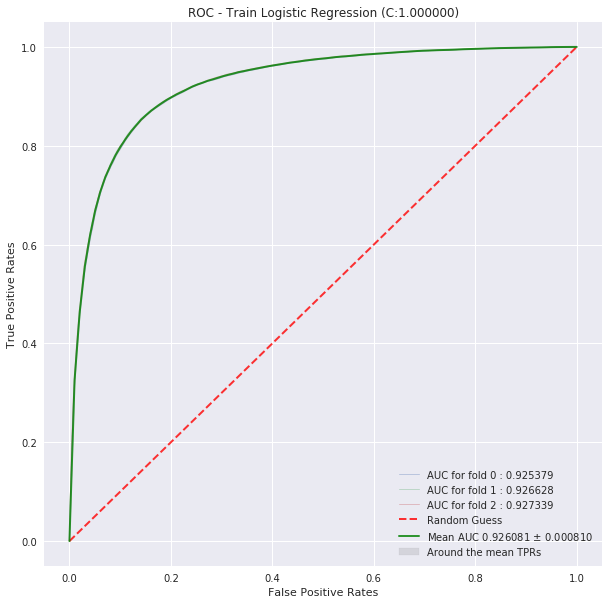

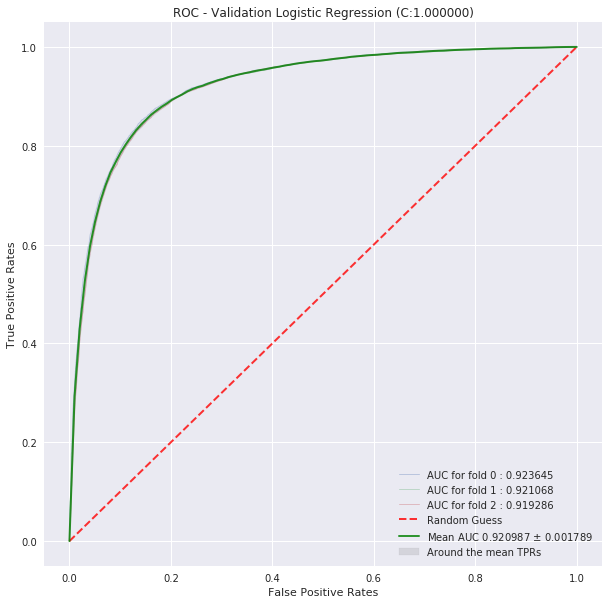

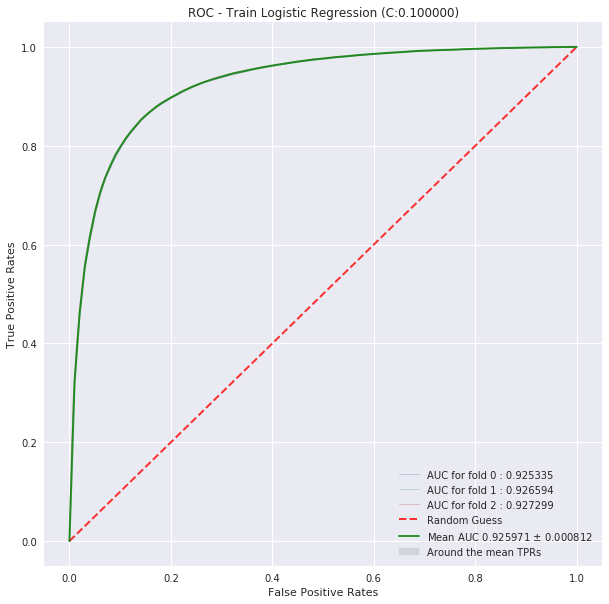

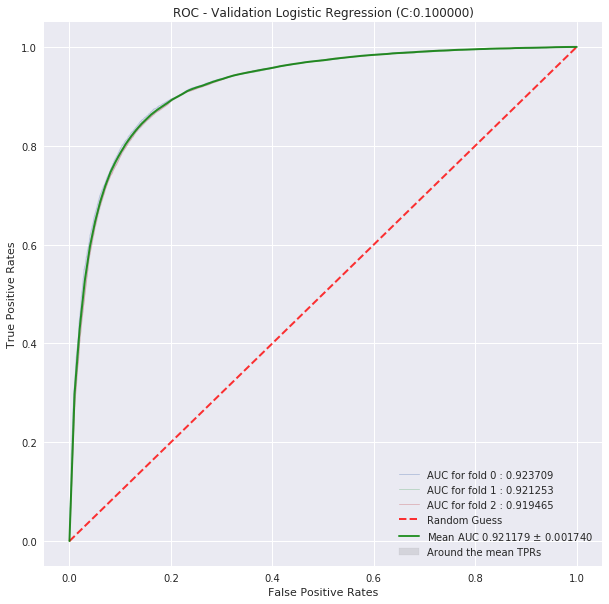

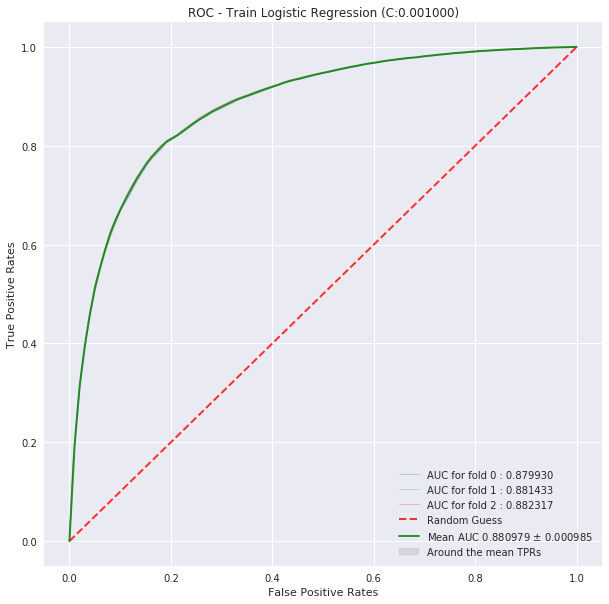

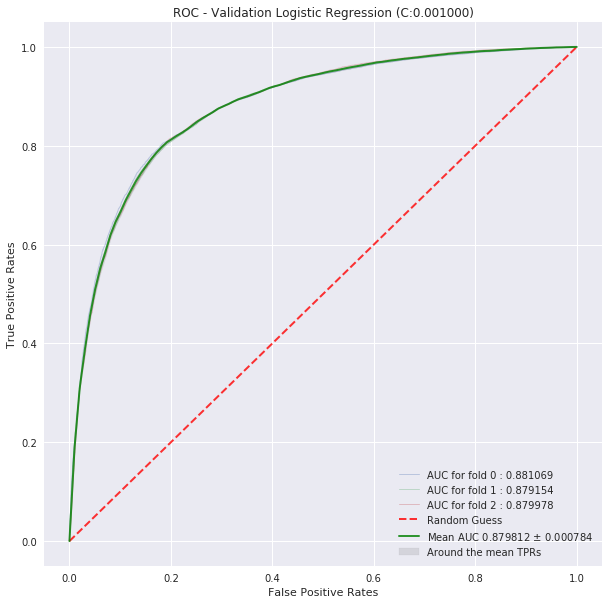

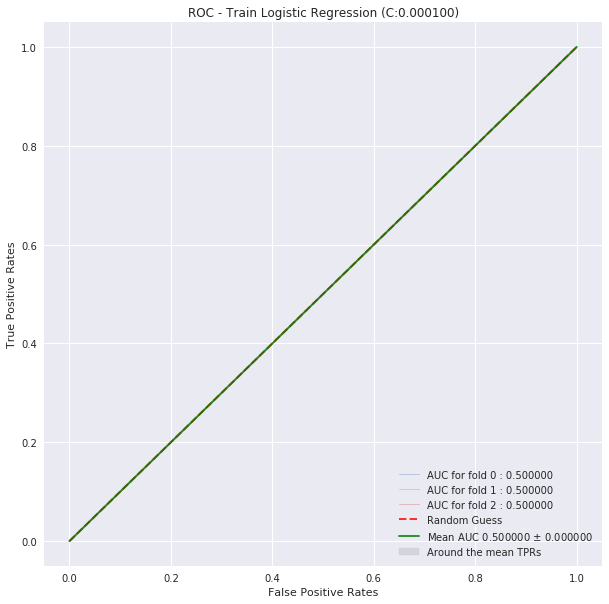

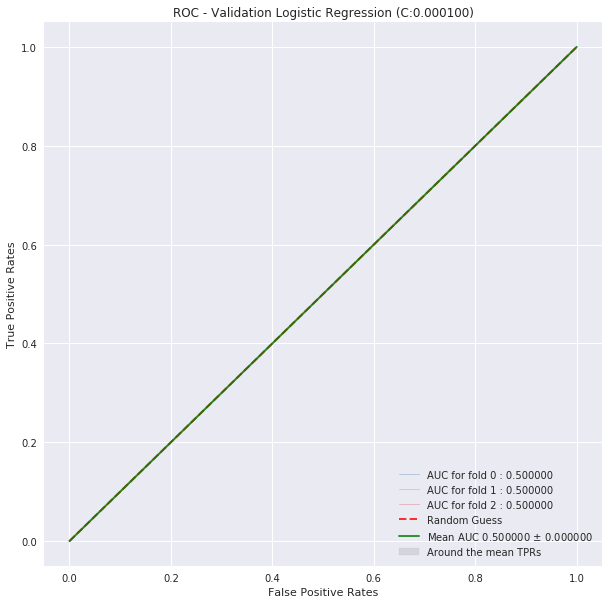

Best hyperparam value:  0.1


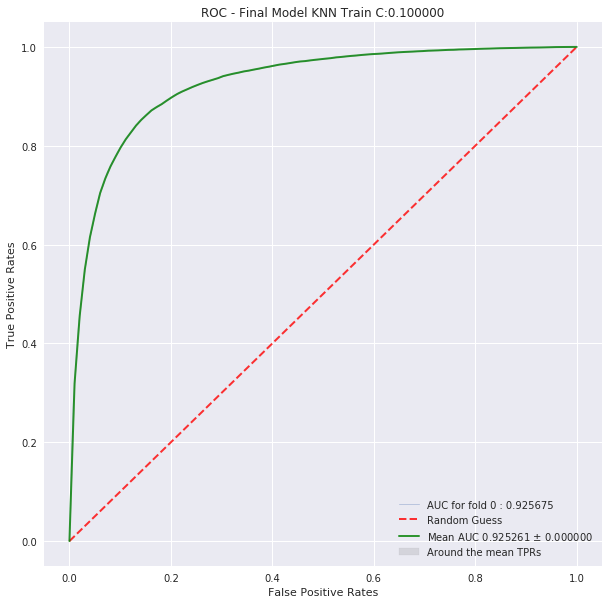

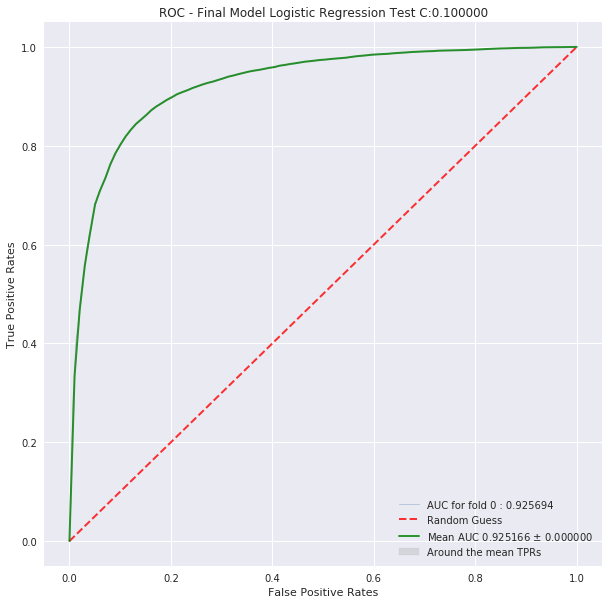

Test auc score  0.9251658542278238


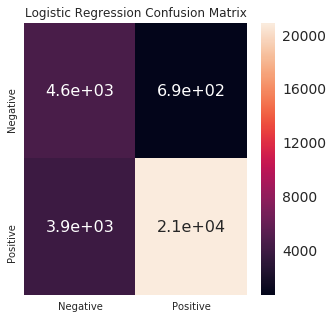

              Negative      Positive
Precision     0.540861      0.968195
Recall        0.869234      0.843621
Fscore        0.666813      0.901626
Support    5246.000000  24754.000000


In [12]:
# read the train, test data and preprocess it
train_features, train_labels, test_features, test_labels = preprocess_data(config_dict,
                                                                            scaling=True,
                                                                            dim_reduction=False)

# set feature names, last column is the ID column
feature_name_list = train_features.columns.values.tolist()

# train and validate the model
model = train_and_validate_model(config_dict, train_features, train_labels)

# test and evaluate the model
ptabe_entry_a1 = test_and_evaluate_model(model, test_features, test_labels)

#### [A.1.1] Calculating sparsity on weight vector obtained using L1 regularization on BOW,<font color='red'> SET 1</font>

In [13]:
sparse_df = pd.DataFrame({'Feature':feature_name_list , 'Weight':model.coef_[0]}, 
                         index=range(len(feature_name_list)))

# non zero weight entries
nonzero_weights_df = sparse_df[sparse_df['Weight'] != 0.0]
zero_weights_df = sparse_df[sparse_df['Weight'] == 0.0]

In [14]:
print('\n\nSome Non Sparse features:\n ', nonzero_weights_df.head())
print('\n\nSome Sparse features:\n ', zero_weights_df.head())



Some Non Sparse features:
     Feature    Weight
0      abl  0.069776
1  absolut  0.026646
2     acid -0.038094
3   actual  0.021660
4       ad -0.000436


Some Sparse features:
       Feature  Weight
71    cereal     0.0
87   coconut     0.0
88     coffe     0.0
104    coupl     0.0
319   peanut     0.0


### [A.2] Applying Logistic Regression with L2 regularization on BOW,<font color='red'> SET 1</font>

In [15]:
config_dict = {
    'train_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/BOW/train_bow_bigram.csv',
    'test_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/BOW/test_bow_bigram.csv',
    'train_size' : 70000,
    'test_size' : 30000,
    'hyperparam_list' : [1.0, 0.1, 0.001, 0.0001],
    'penalty' : 'l2', # l1, l2
}

Train df shape (69997, 503)
Class label distribution in train df:
 1    35000
0    34997
Name: Label, dtype: int64
Test df shape (30000, 503)
Class label distribution in test df:
 1    24754
0     5246
Name: Label, dtype: int64
Shape of ->  train features :69997,501, test features: 30000,501
Shape of -> train labels :69997, test labels: 30000


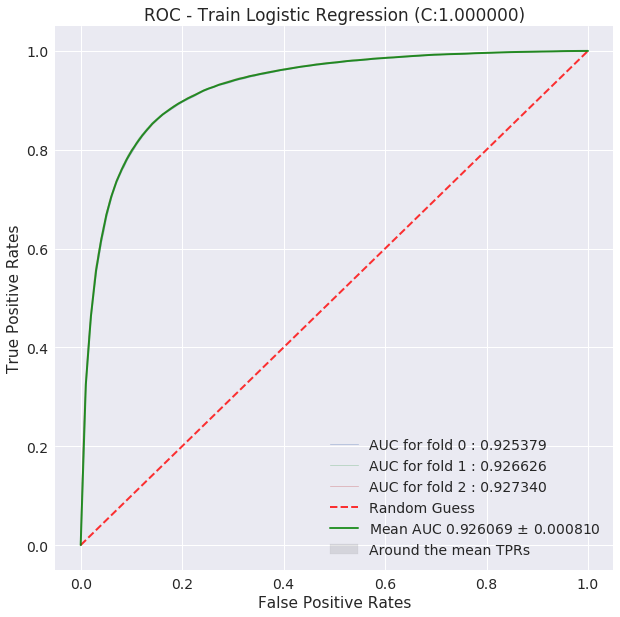

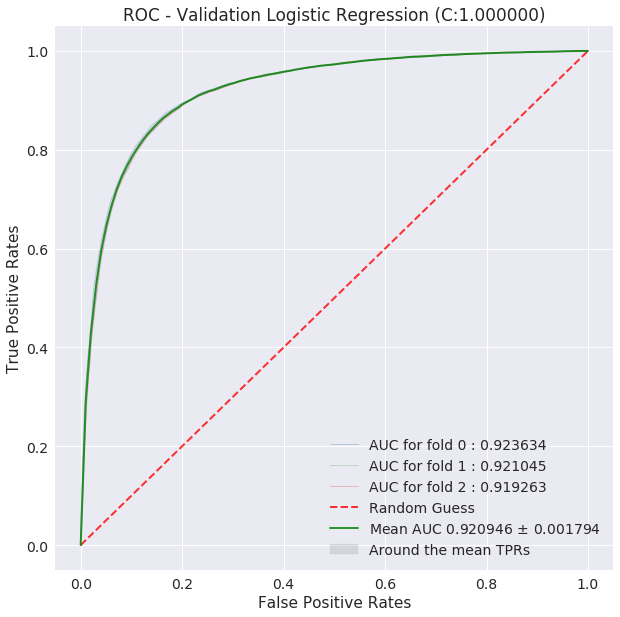

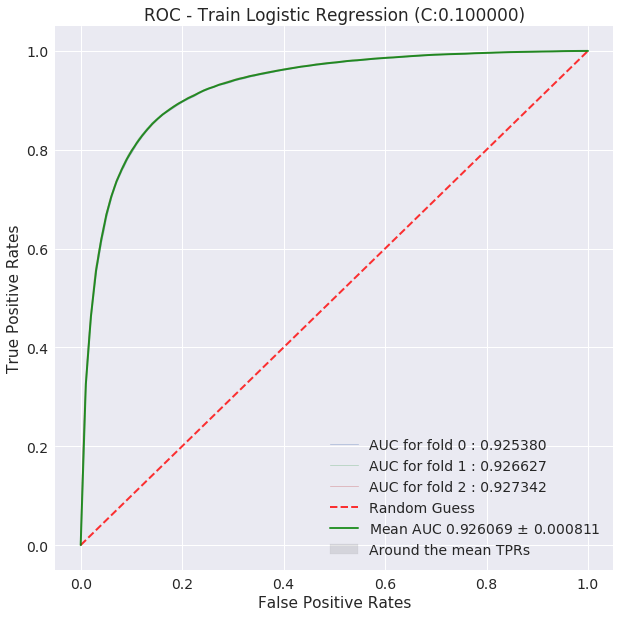

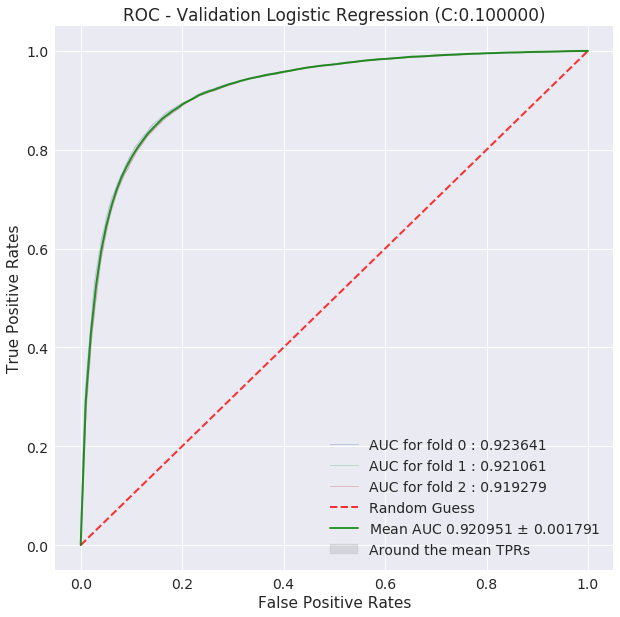

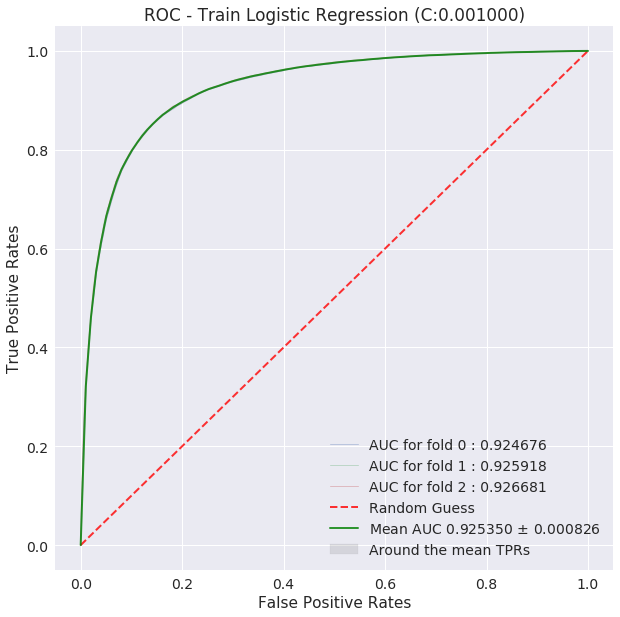

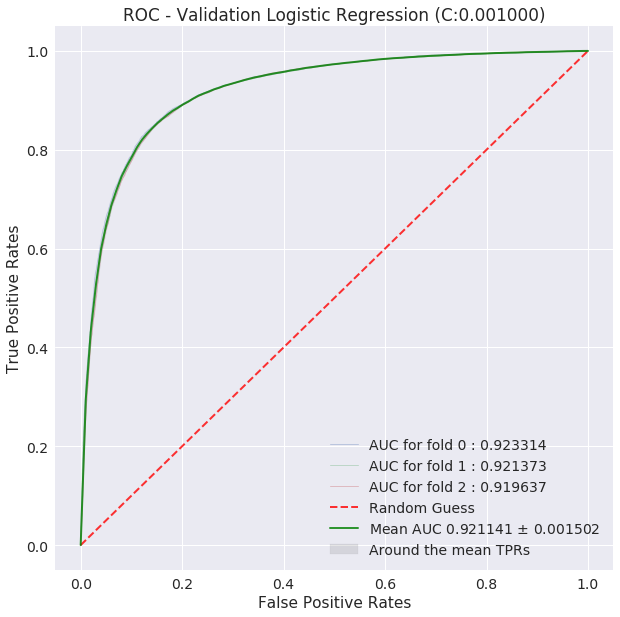

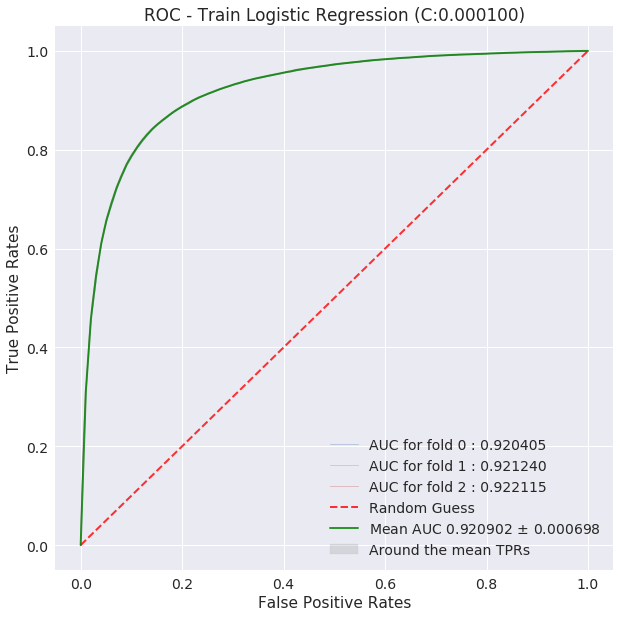

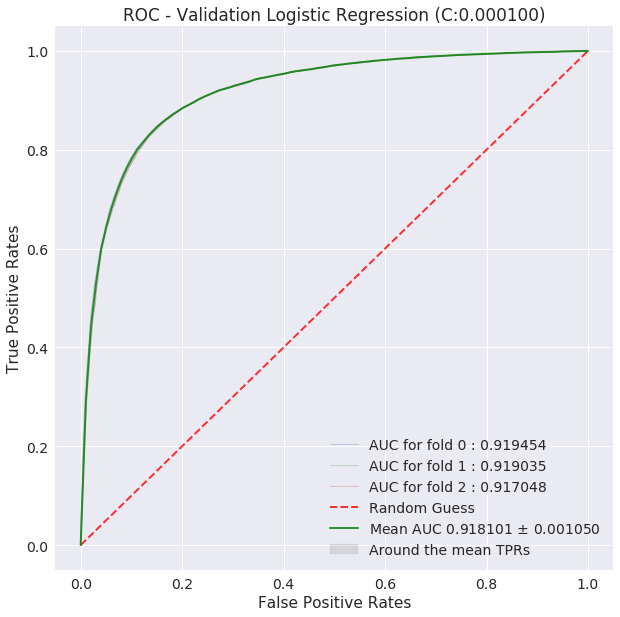

Best hyperparam value:  0.001


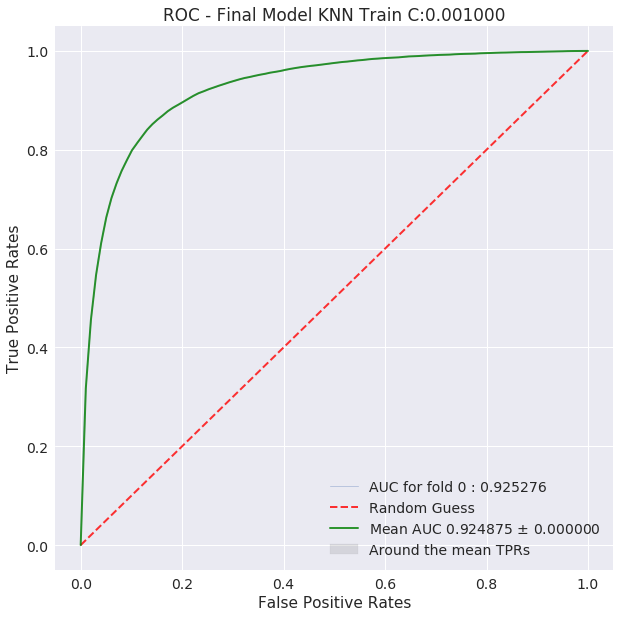

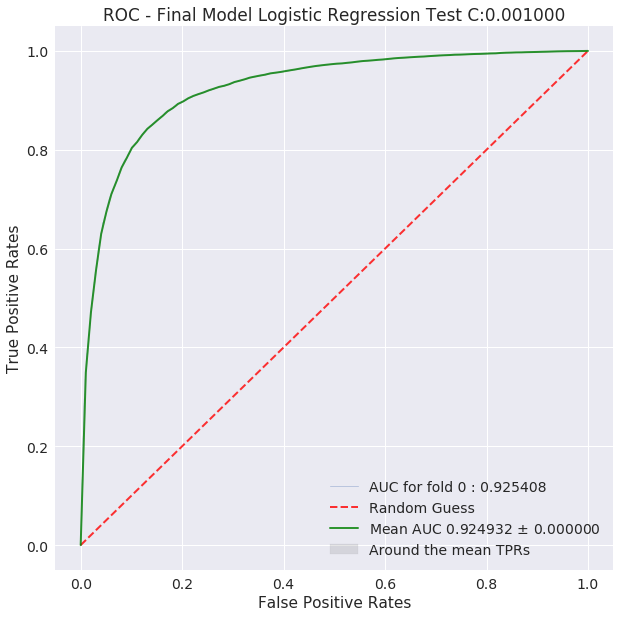

Test auc score  0.924932446383525


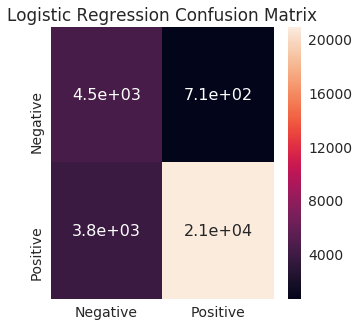

              Negative      Positive
Precision     0.542618      0.967321
Recall        0.865231      0.845439
Fscore        0.666961      0.902283
Support    5246.000000  24754.000000


In [16]:
# read the train, test data and preprocess it
train_features, train_labels, test_features, test_labels = preprocess_data(config_dict,
                                                                           scaling=True,
                                                                           dim_reduction=False)

# set feature names, last column is the ID column
feature_name_list = train_features.columns.tolist()

# train and validate the model
model = train_and_validate_model(config_dict, train_features, train_labels)

# test and evaluate the model
ptabe_entry_a2 = test_and_evaluate_model(model, test_features, test_labels)

## Observation

%%HTML
<ul>
<li> Fo model with L1 regularization model, as the value of C decreases the performace of model is
     almost similar to random guess model (from the ROC plot for C=0.00001)
<li> Using L1 regularizer features (coconut, peanut, coffe) has zero weights which implies
     the feature is not important, we need to check the multicolinearty to confirm the same </li>
</ul>

#### [A.2.1] Performing pertubation test (multicollinearity check) on BOW,<font color='red'> SET 1</font>

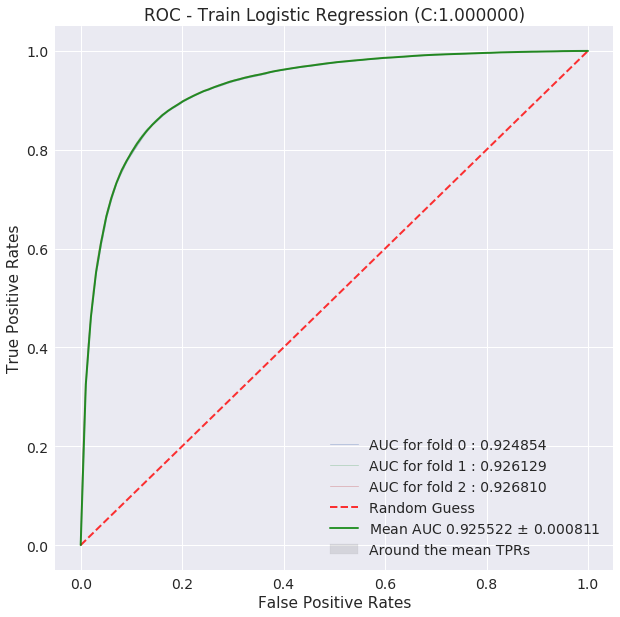

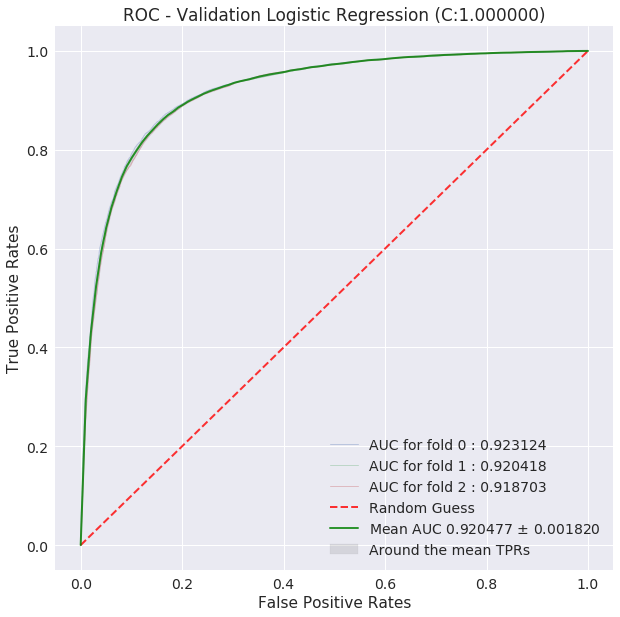

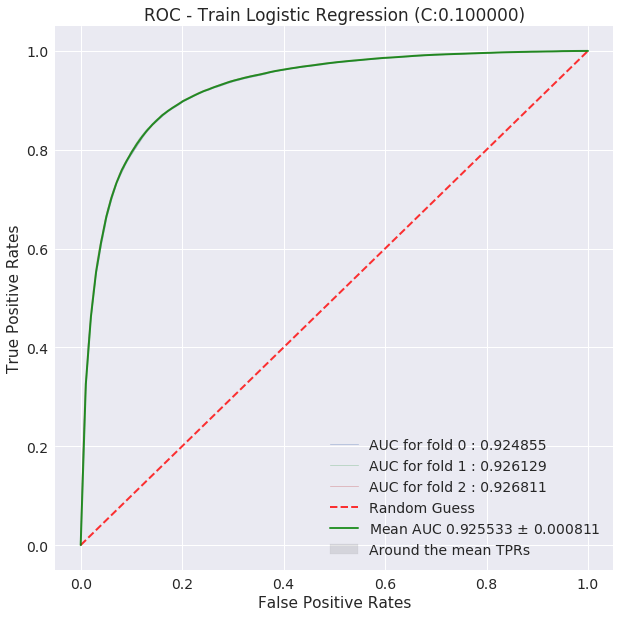

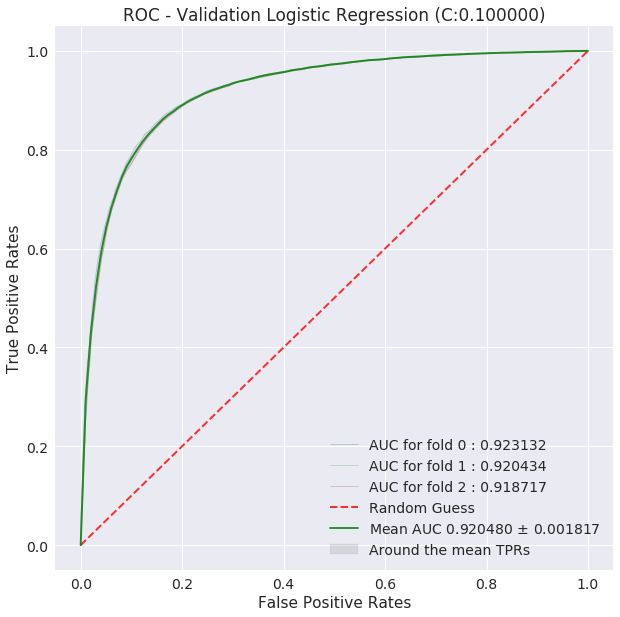

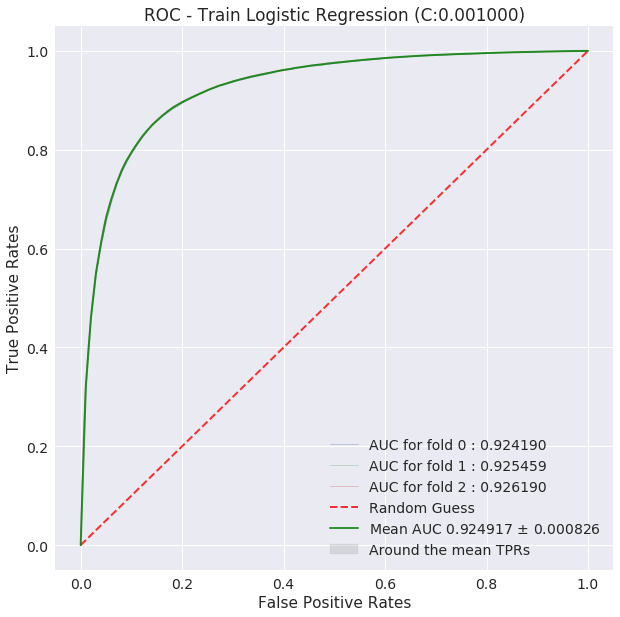

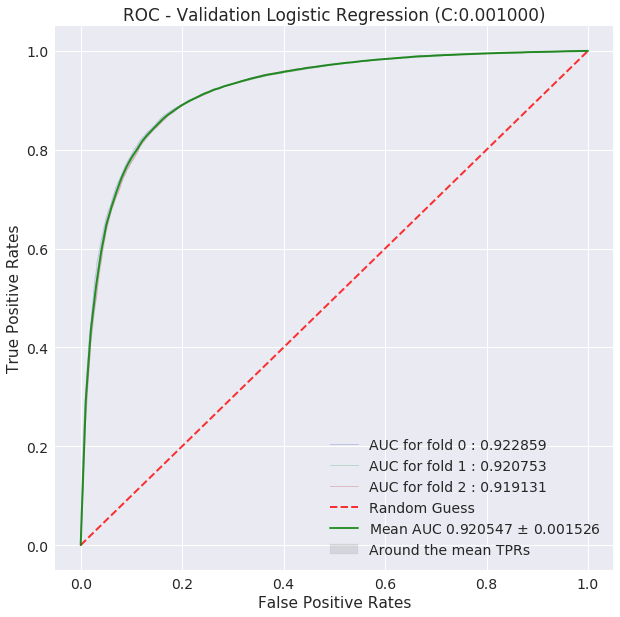

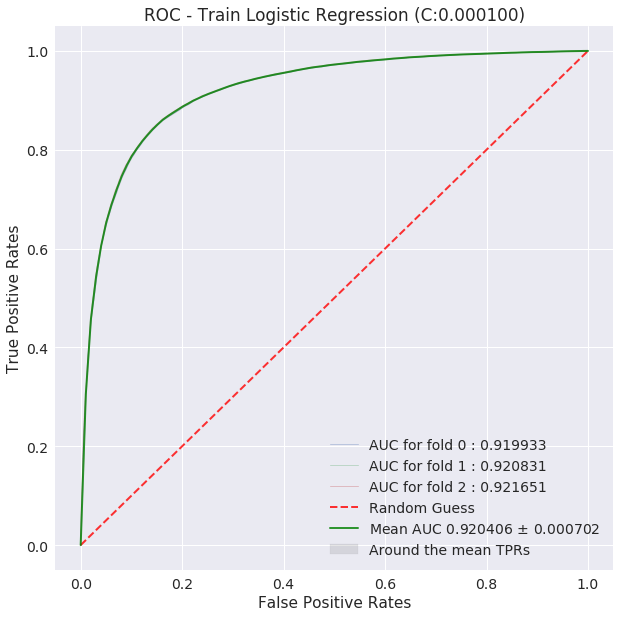

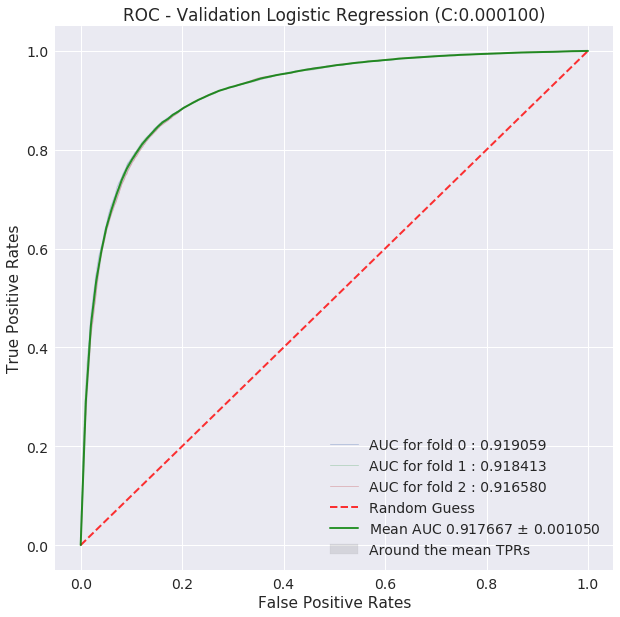

Best hyperparam value:  0.001


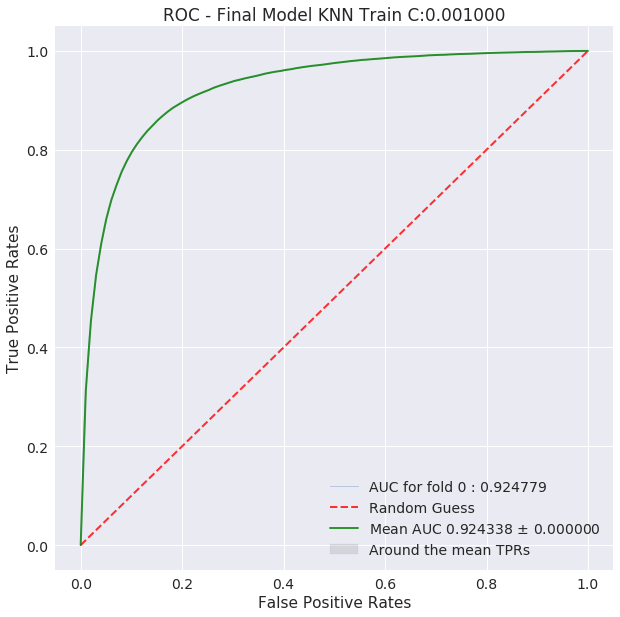

In [17]:
train_features_dash = get_pertubated_dataset(train_features)
# train and validate the model on pertubated dataset
model_dash = train_and_validate_model(config_dict, train_features_dash, train_labels)

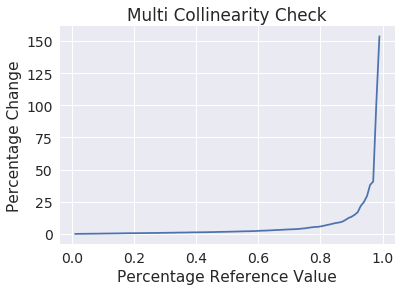

In [18]:
weight_per_change_vector = get_percentage_change_vector(model, model_dash)
# set the indices as the feature names
weight_per_change_vector.index = feature_name_list
multi_colinearity_check(weight_per_change_vector)

#### testing for further

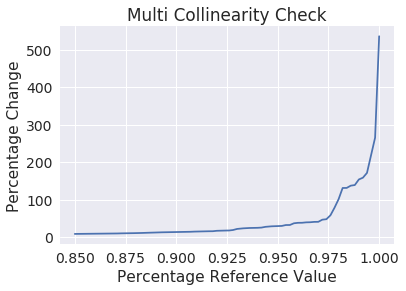

In [19]:
multi_colinearity_check(weight_per_change_vector, 0.85, 0.001)

In [20]:
elbow_threshold = 0.9775
upper_limit = weight_per_change_vector.quantile(q=elbow_threshold)
# identify the features whose percentage change is more than some threshold
greater_than_threshold = weight_per_change_vector[weight_per_change_vector >= upper_limit]

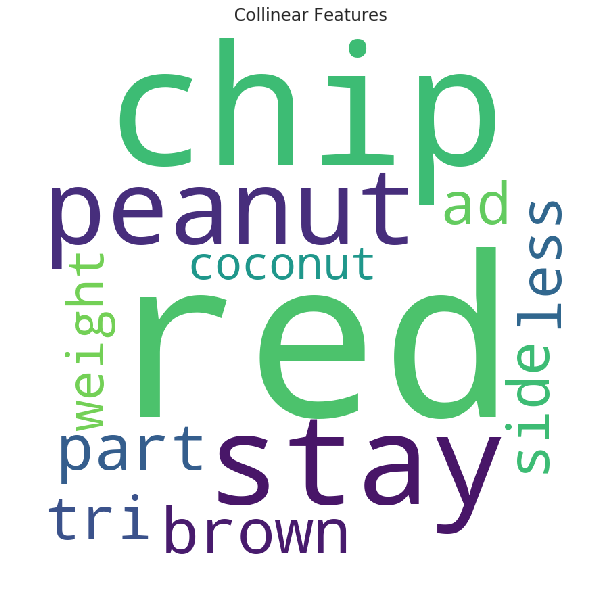

In [21]:
# create a word cloud
wc = WordCloud(background_color='white', width=800, height=800)

# create word cloud
wc_output = wc.generate_from_frequencies(dict(greater_than_threshold))
plt.figure(figsize=(8, 8))
plt.imshow(wc_output)
plt.axis('off')
plt.tight_layout(pad=0.0)
plt.title('Collinear Features')
plt.show()

%%HTML
<ul>
<li> From the wordcloud we can see that many words (coconut, coffe) have percentage change above
     97%. Shows multicolinearity
</ul>

### [A.3] Feature Importance on BOW,<font color='red'> SET 1</font>

In [22]:
# word cloud object for displaying feature importances
wc = WordCloud(background_color='white', width=800, height=800)

# form a feature importance data frame
feat_imp_df = pd.DataFrame({'Feature': feature_name_list, 'Weight':model.coef_[0]}, 
                           index=range(len(feature_name_list)))

#### [A.3.1] Top 10 important features of positive class from<font color='red'> SET 1</font>

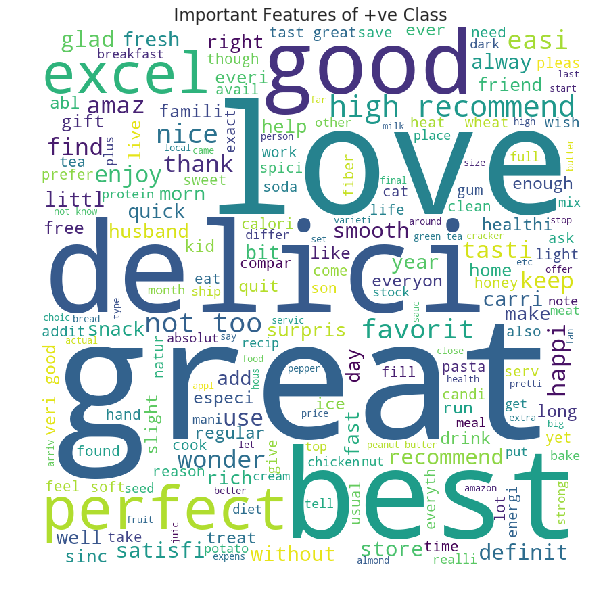

In [23]:
# annotate with feature names (words)
feat_imp_df_positive =  feat_imp_df[feat_imp_df['Weight'] > 0.0]

# create word cloud
wc_output = wc.generate_from_frequencies(dict(zip(feat_imp_df_positive['Feature'], 
                                                  feat_imp_df_positive['Weight'])))
plt.figure(figsize=(8, 8))
plt.imshow(wc_output)
plt.axis('off')
plt.tight_layout(pad=0.0)
plt.title('Important Features of +ve Class')
plt.show()

#### [A.3.2] Top 10 important features of negative class from<font color='red'> SET 1</font>

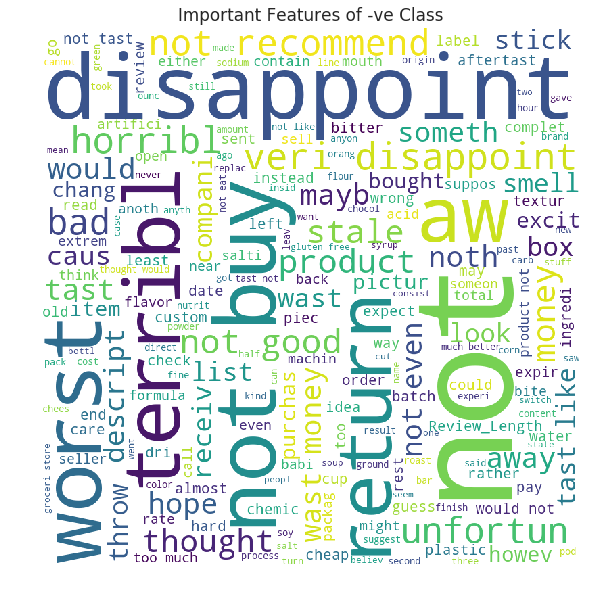

In [24]:
# annotate with feature names (words)
feat_imp_df_negative =  feat_imp_df[feat_imp_df['Weight'] < 0.0]

# create word cloud
wc_output = wc.generate_from_frequencies(dict(zip(feat_imp_df_negative['Feature'], 
                                                  abs(feat_imp_df_negative['Weight']))))
plt.figure(figsize=(8, 8))
plt.imshow(wc_output)
plt.axis('off')
plt.tight_layout(pad=0.0)
plt.title('Important Features of -ve Class')
plt.show()

%%HTML
<ul>
<li> From the word clouds for both +ve, -ve class feature importances there are many useful
     features which helps to distiguish between +ve and -ve class. </li>
<li> 'great', 'perfect', 'best', 'love', 'best' are some of the important word for +ve class </li>
<li> We got many bigram features for -ve class eg: 'not recomment', 'veri disappoint', 'not buy' etc</li>
<li> Some important unigram words for -ve class are 'worst', 'horrible', 'terrible' etc.</li>
</ul>

## [B] Logistic Regression on TFIDF,<font color='red'> SET 2</font>

### [B.1] Applying Logistic Regression with L1 regularization on TFIDF,<font color='red'> SET 2</font>

In [25]:
config_dict = {
    'train_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/TFIDF/train_bigram_tfidf.csv',
    'test_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/TFIDF/test_bigram_tfidf.csv',
    'train_size' : 70000,
    'test_size' : 30000,
    'hyperparam_list' : [1.0, 0.1, 0.001, 0.0001],
    'penalty' : 'l1', # l1, l2
}

Train df shape (69997, 503)
Class label distribution in train df:
 1    35000
0    34997
Name: Label, dtype: int64
Test df shape (30000, 503)
Class label distribution in test df:
 1    24754
0     5246
Name: Label, dtype: int64
Shape of ->  train features :69997,501, test features: 30000,501
Shape of -> train labels :69997, test labels: 30000


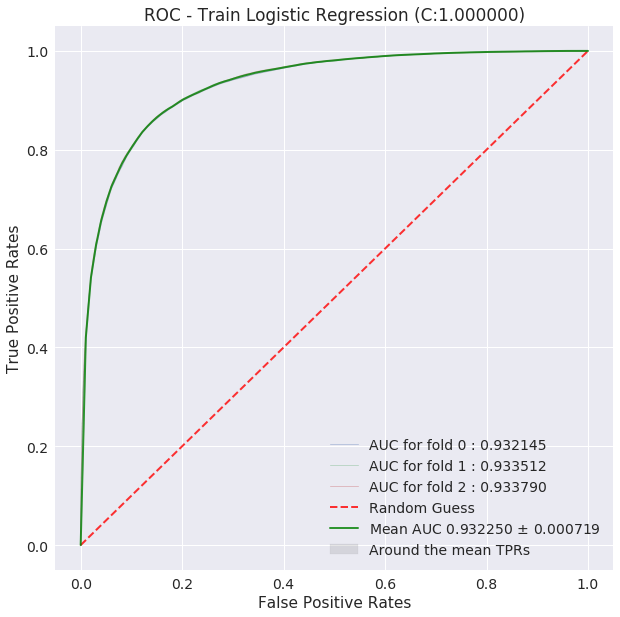

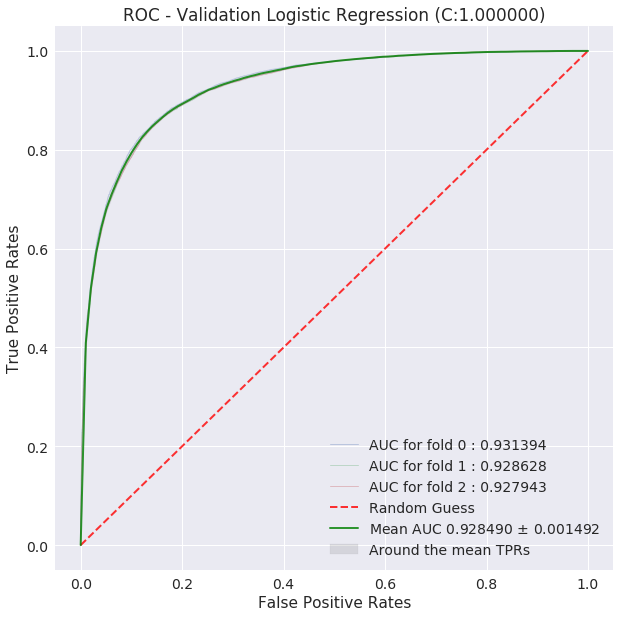

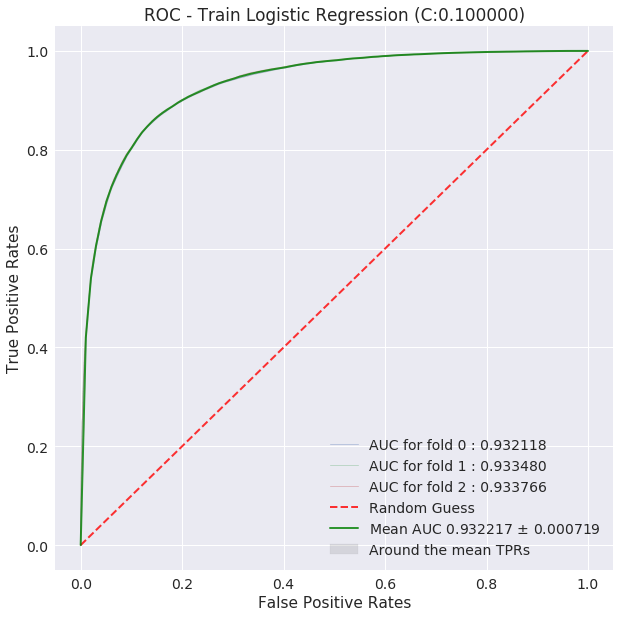

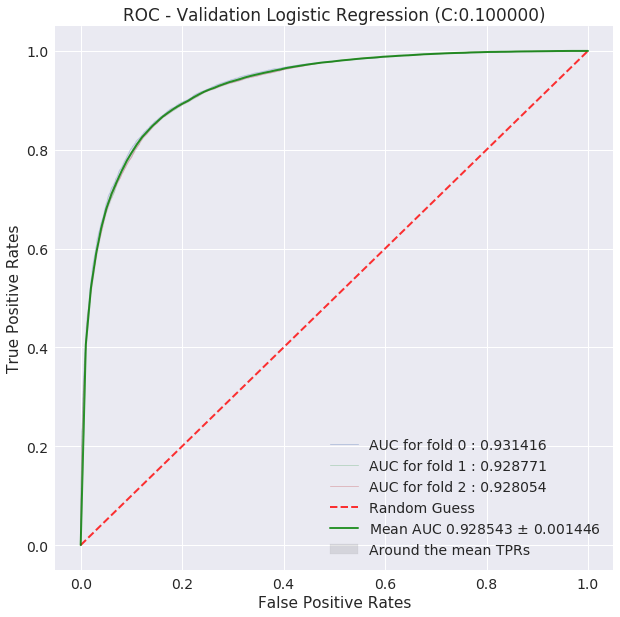

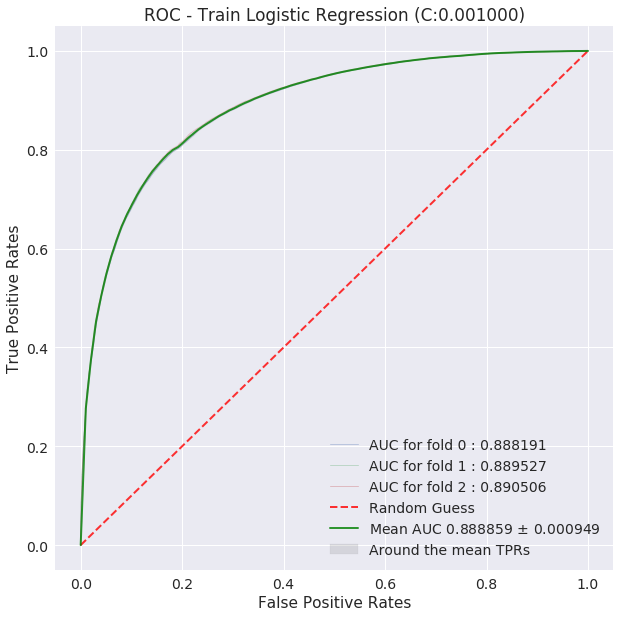

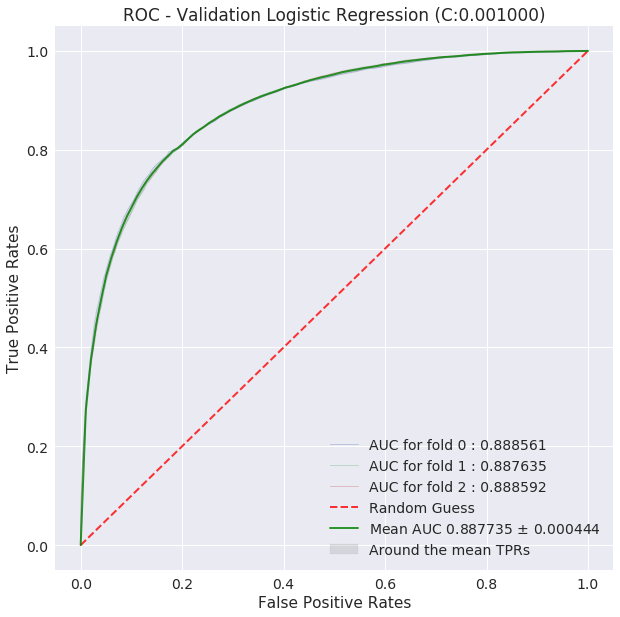

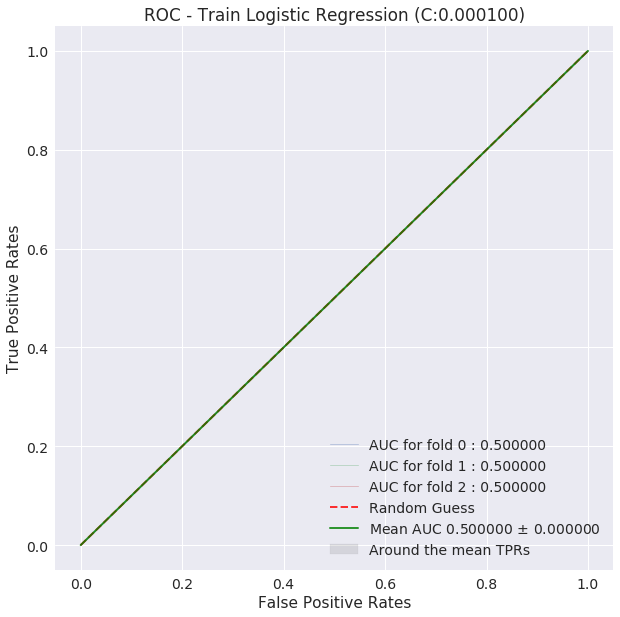

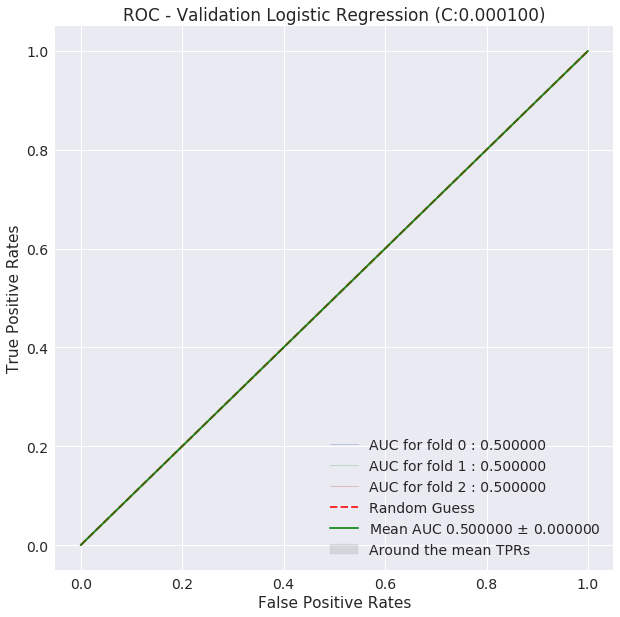

Best hyperparam value:  0.1


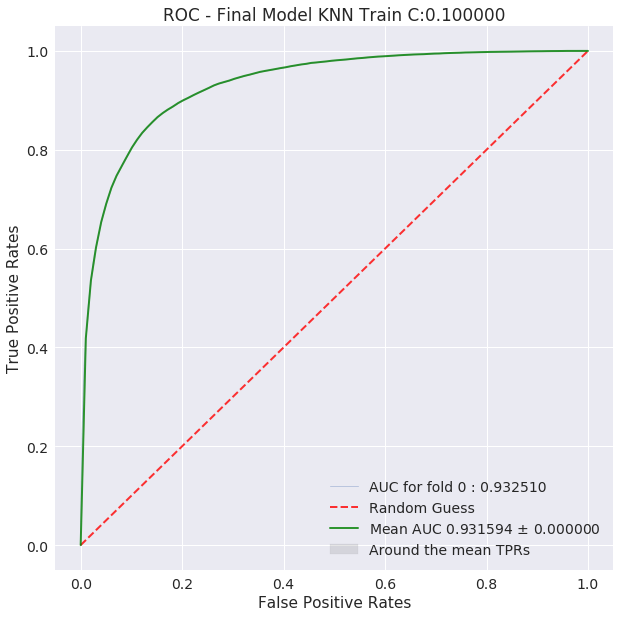

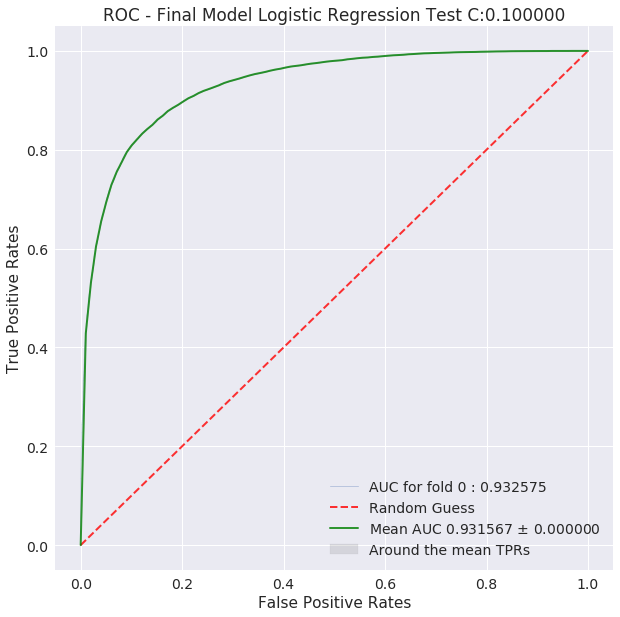

Test auc score  0.9315674316078291


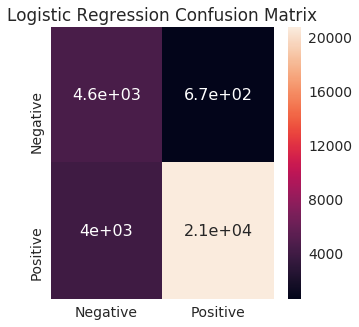

              Negative      Positive
Precision     0.533924      0.968910
Recall        0.873046      0.838491
Fscore        0.662616      0.898995
Support    5246.000000  24754.000000


In [26]:
# read the train, test data and preprocess it
train_features, train_labels, test_features, test_labels = preprocess_data(config_dict,
                                                                            scaling=True,
                                                                            dim_reduction=False)
# set feature names, last column is the ID column
feature_name_list = train_features.columns.tolist()

# train and validate the model
model = train_and_validate_model(config_dict, train_features, train_labels)

# test and evaluate the model
ptabe_entry_b1 = test_and_evaluate_model(model, test_features, test_labels)

### [B.2] Applying Logistic Regression with L2 regularization on TFIDF,<font color='red'> SET 2</font>

In [27]:
config_dict = {
    'train_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/TFIDF/train_bigram_tfidf.csv',
    'test_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/TFIDF/test_bigram_tfidf.csv',
    'train_size' : 70000,
    'test_size' : 30000,
    'hyperparam_list' : [1.0, 0.1, 0.001, 0.0001],
    'penalty' : 'l2', # l1, l2
}

Train df shape (69997, 503)
Class label distribution in train df:
 1    35000
0    34997
Name: Label, dtype: int64
Test df shape (30000, 503)
Class label distribution in test df:
 1    24754
0     5246
Name: Label, dtype: int64
Shape of ->  train features :69997,501, test features: 30000,501
Shape of -> train labels :69997, test labels: 30000


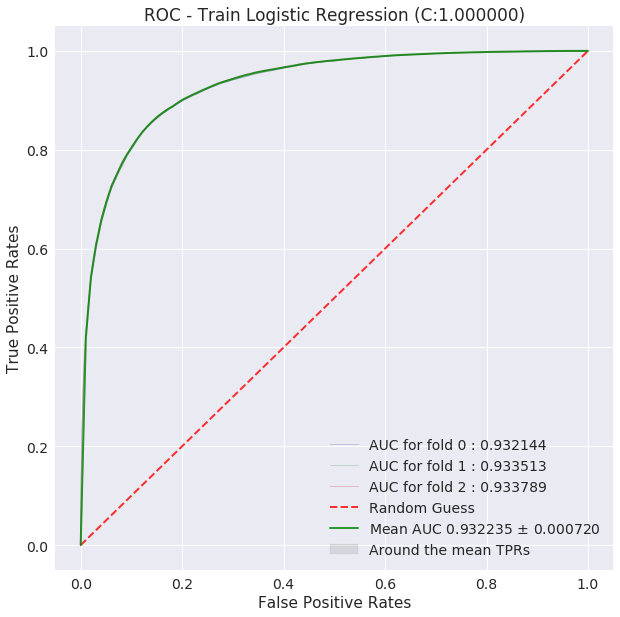

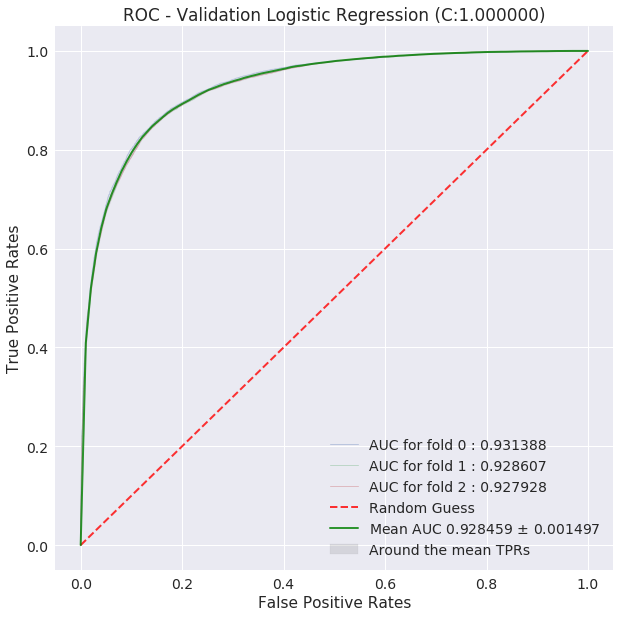

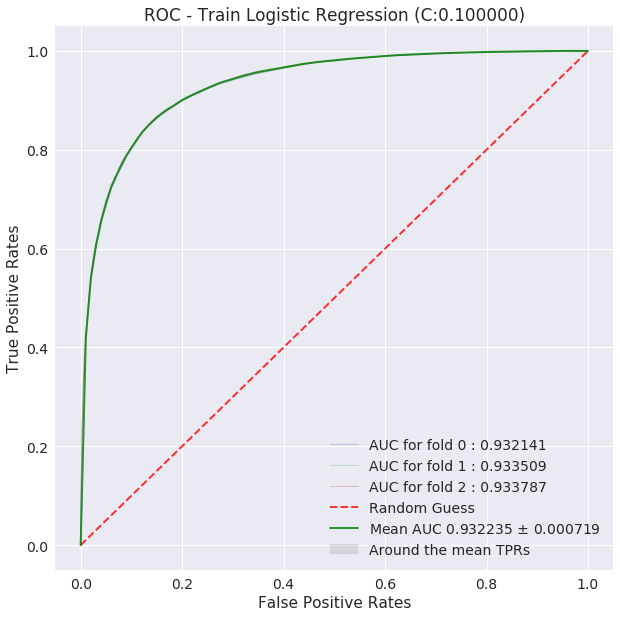

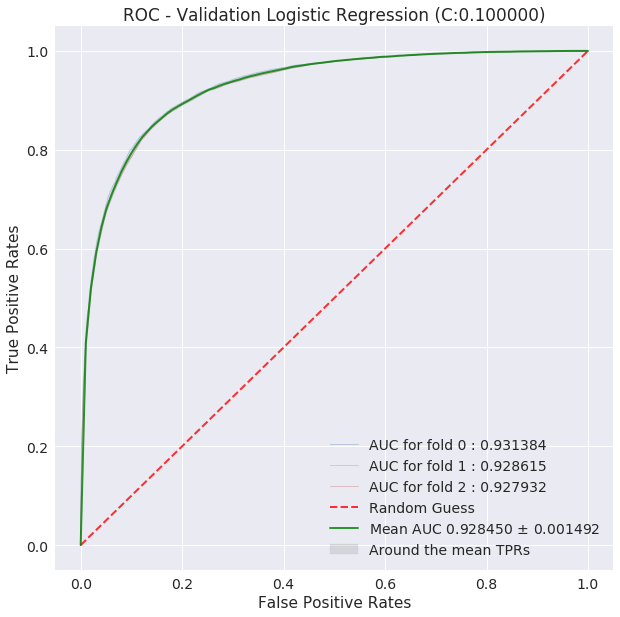

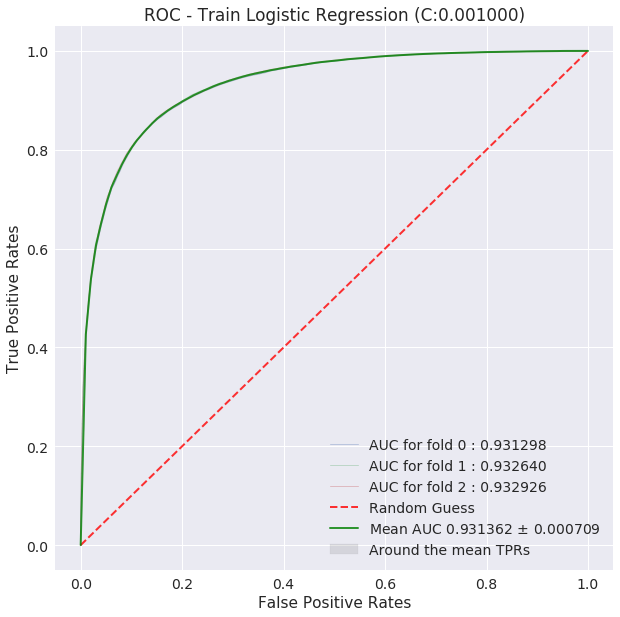

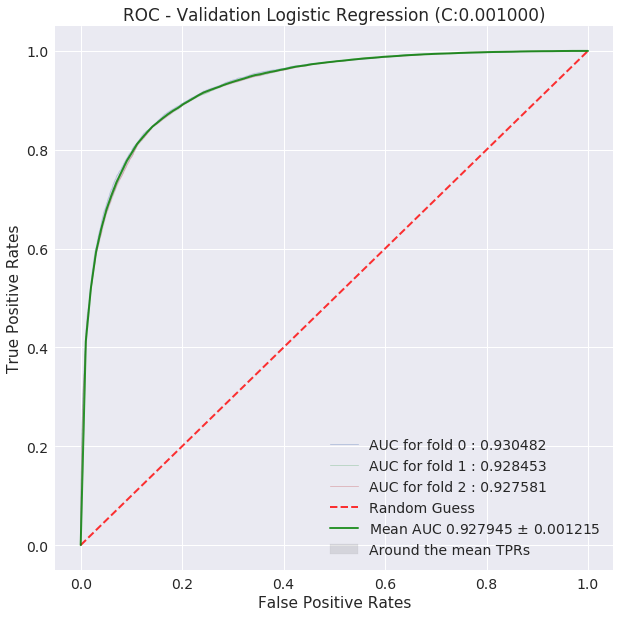

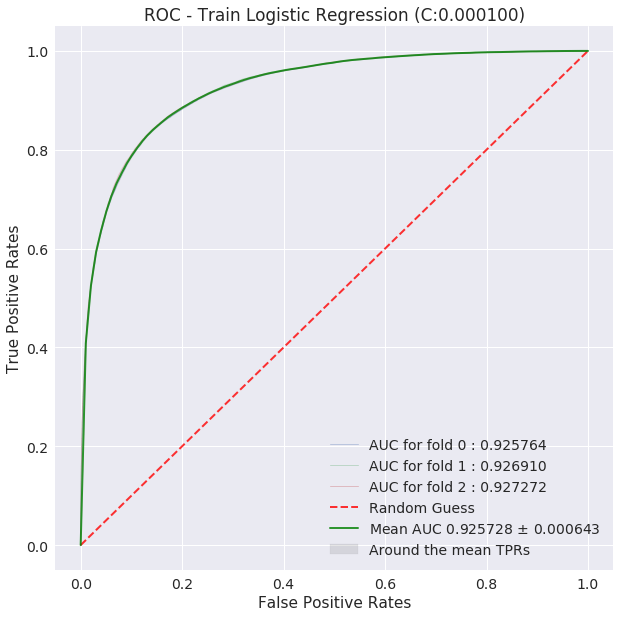

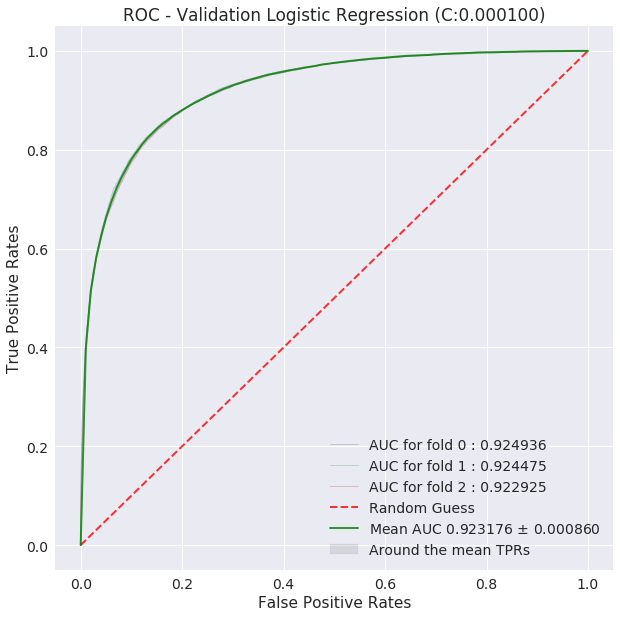

Best hyperparam value:  1.0


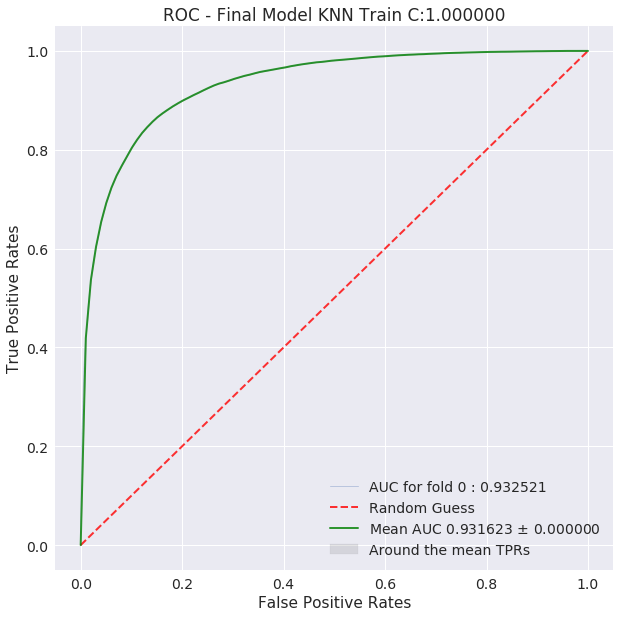

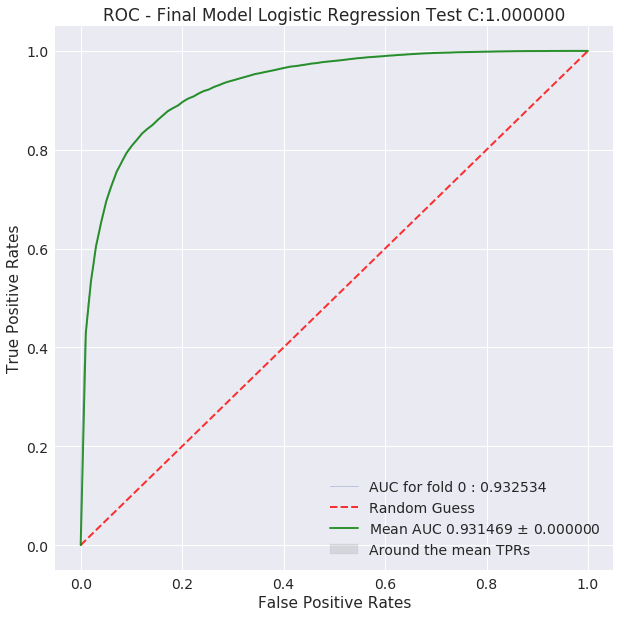

Test auc score  0.9314694982465848


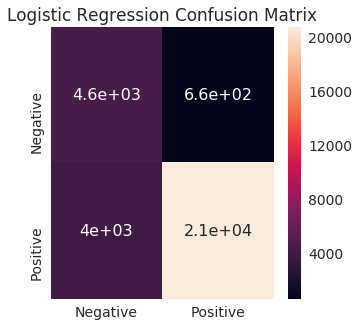

              Negative      Positive
Precision     0.533170      0.968937
Recall        0.873237      0.837966
Fscore        0.662090      0.898705
Support    5246.000000  24754.000000


In [28]:
# read the train, test data and preprocess it
train_features, train_labels, test_features, test_labels = preprocess_data(config_dict,
                                                                            scaling=True,
                                                                            dim_reduction=False)

# set feature names, last column is the ID column
feature_name_list = train_features.columns.tolist()

# train and validate the model
model = train_and_validate_model(config_dict, train_features, train_labels)

# test and evaluate the model
ptabe_entry_b2 = test_and_evaluate_model(model, test_features, test_labels)

### [B.3] Feature Importance on TFIDF,<font color='red'> SET 2</font>

In [29]:
# word cloud object for displaying feature importances
wc = WordCloud(background_color='white', width=800, height=800)

# form a feature importance data frame
feat_imp_df = pd.DataFrame({'Feature': feature_name_list, 'Weight':model.coef_[0]}, 
                           index=range(len(feature_name_list)))

#### [B.3.1] Top 10 important features of positive class from<font color='red'> SET 2</font>

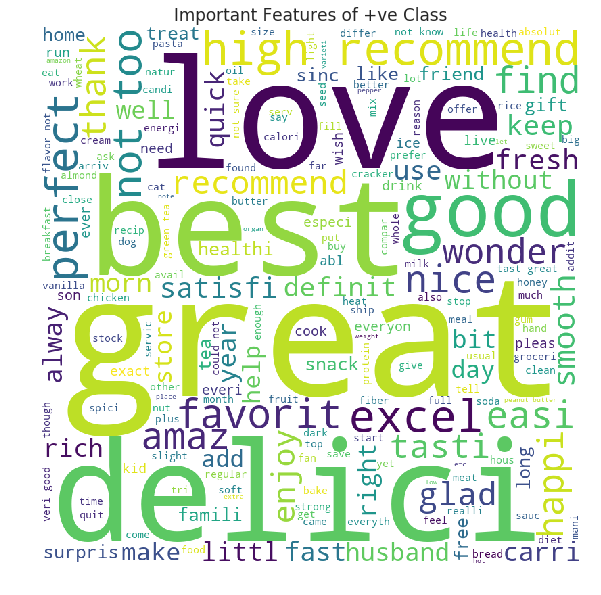

In [30]:
# annotate with feature names (words)
feat_imp_df_positive =  feat_imp_df[feat_imp_df['Weight'] > 0.0]

# create word cloud
wc_output = wc.generate_from_frequencies(dict(zip(feat_imp_df_positive['Feature'], 
                                                  feat_imp_df_positive['Weight'])))
plt.figure(figsize=(8, 8))
plt.imshow(wc_output)
plt.axis('off')
plt.tight_layout(pad=0.0)
plt.title('Important Features of +ve Class')
plt.show()

#### [B.3.2] Top 10 important features of negative class from<font color='red'> SET 2</font>

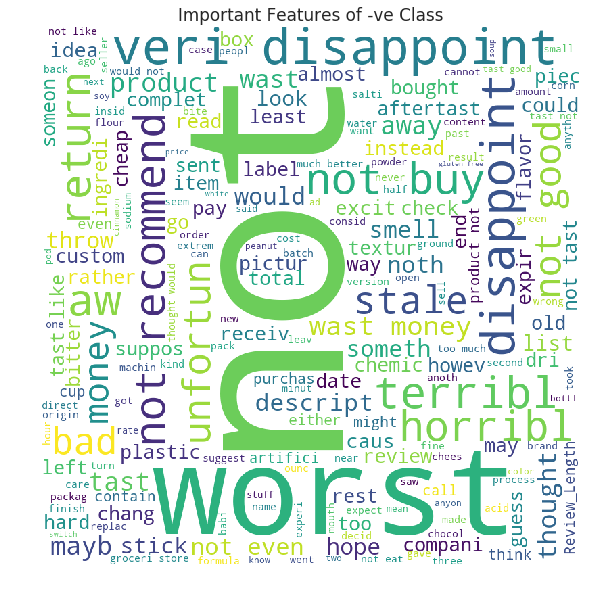

In [31]:
# annotate with feature names (words)
feat_imp_df_negative =  feat_imp_df[feat_imp_df['Weight'] < 0.0]

# create word cloud
wc_output = wc.generate_from_frequencies(dict(zip(feat_imp_df_negative['Feature'], 
                                                  abs(feat_imp_df_negative['Weight']))))
plt.figure(figsize=(8, 8))
plt.imshow(wc_output)
plt.axis('off')
plt.tight_layout(pad=0.0)
plt.title('Important Features of -ve Class')
plt.show()

## Observation

%%HTML
<ul>
<li> Word clouds showed similar results as in previous case </li>
</ul>

## [C] Logistic Regression on AVG W2V,<font color='red'> SET 3</font>

### [C.1] Applying Logistic Regression with L1 regularization on AVG W2V<font color='red'> SET 3</font>

In [32]:
config_dict = {
    'train_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/AVG_W2V/train_avg_w2v.csv',
    'test_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/AVG_W2V/test_avg_w2v.csv',
    'train_size' : 70000,
    'test_size' : 30000,
    'hyperparam_list' : [1.0, 0.1, 0.001, 0.0001],
    'penalty' : 'l1', # l1, l2  
}

Train df shape (69997, 52)
Class label distribution in train df:
 1    35000
0    34997
Name: Label, dtype: int64
Test df shape (30000, 52)
Class label distribution in test df:
 1    24754
0     5246
Name: Label, dtype: int64
Shape of ->  train features :69997,50, test features: 30000,50
Shape of -> train labels :69997, test labels: 30000


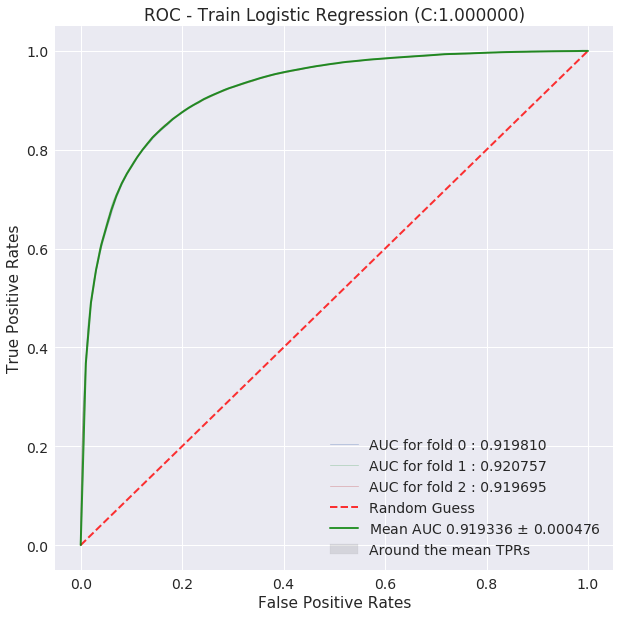

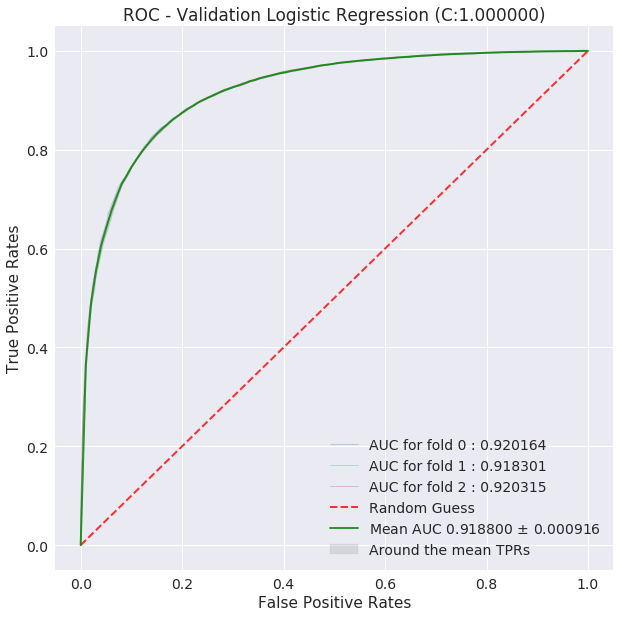

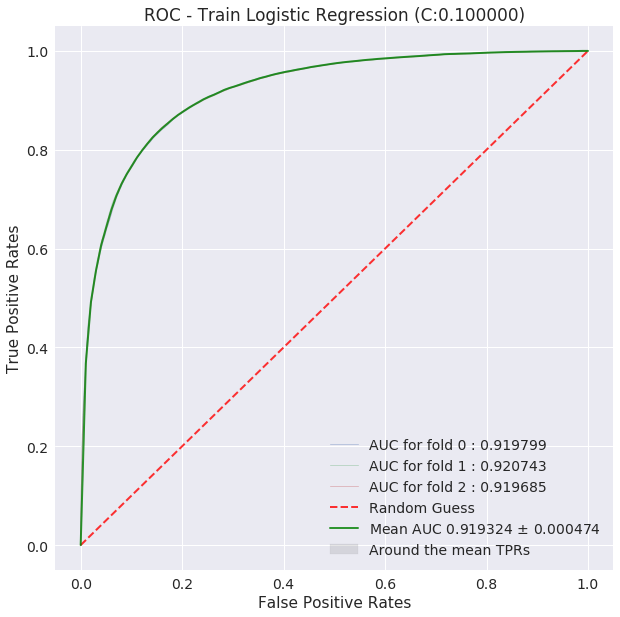

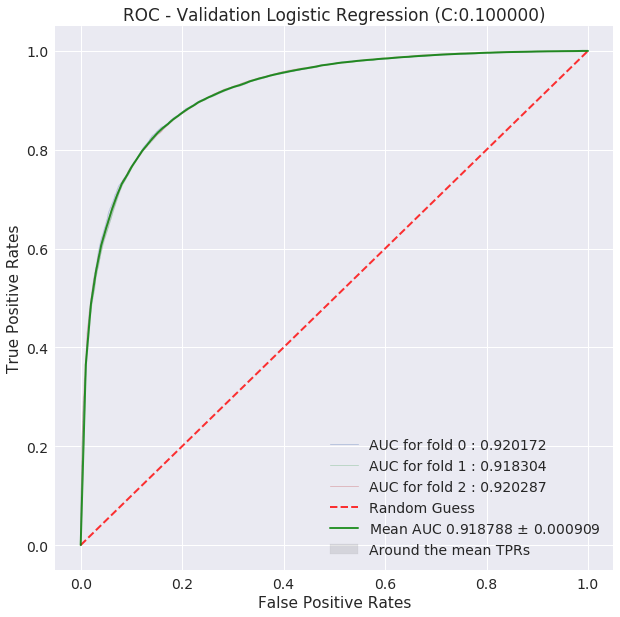

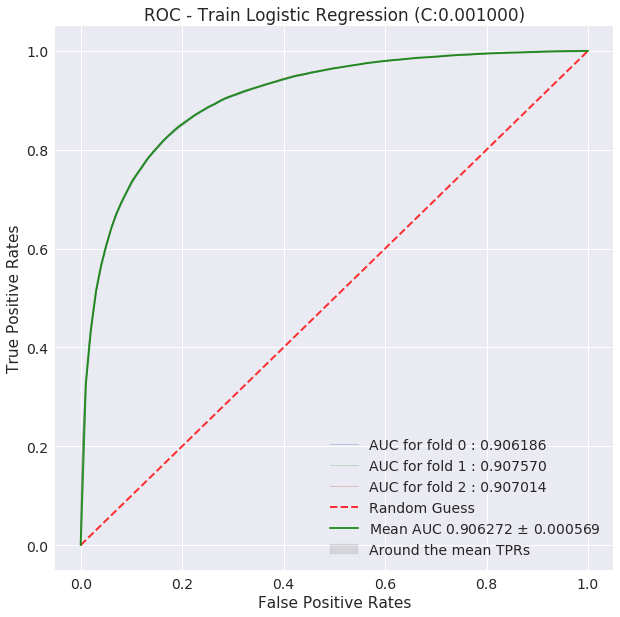

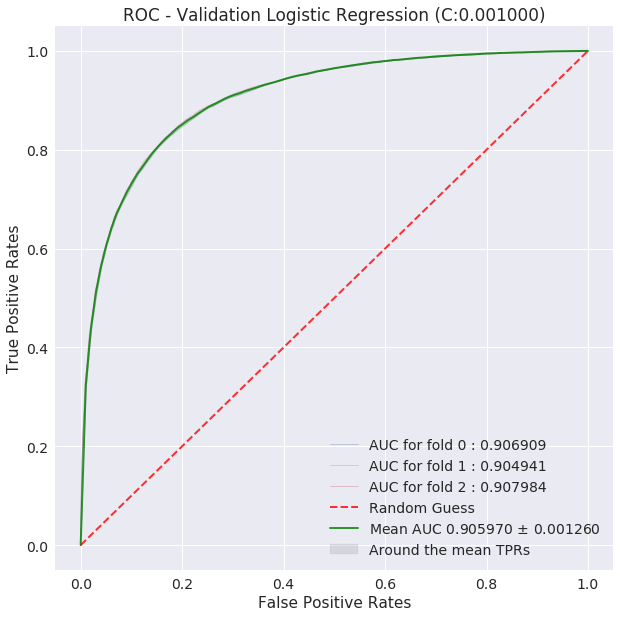

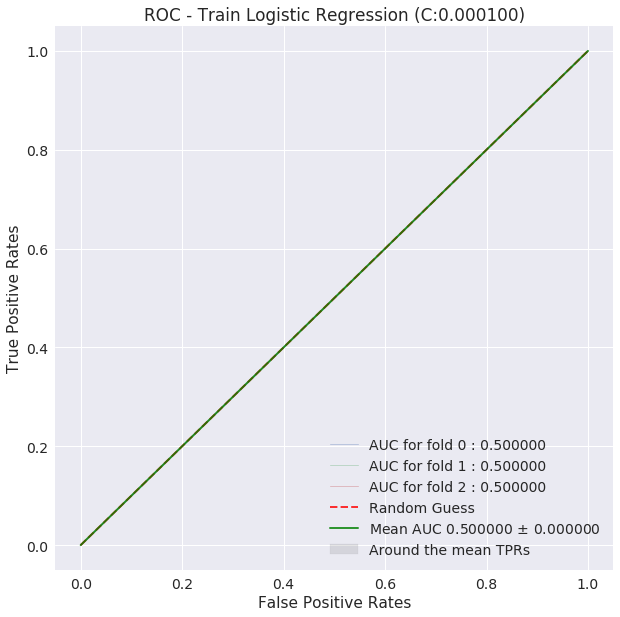

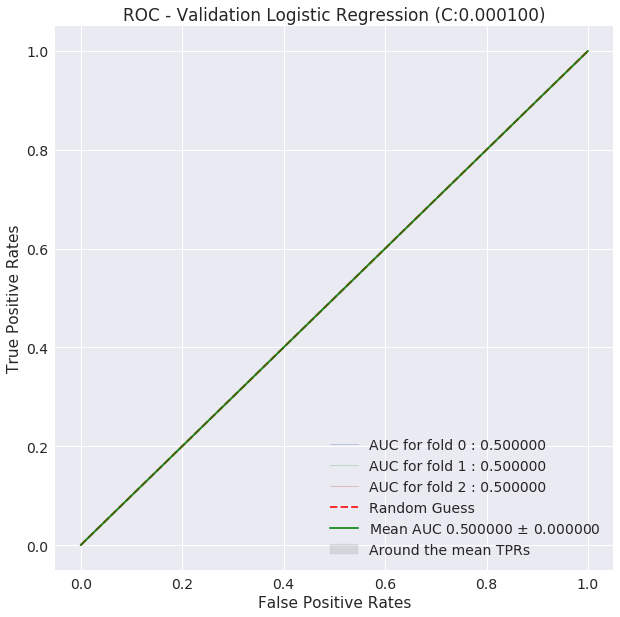

Best hyperparam value:  1.0


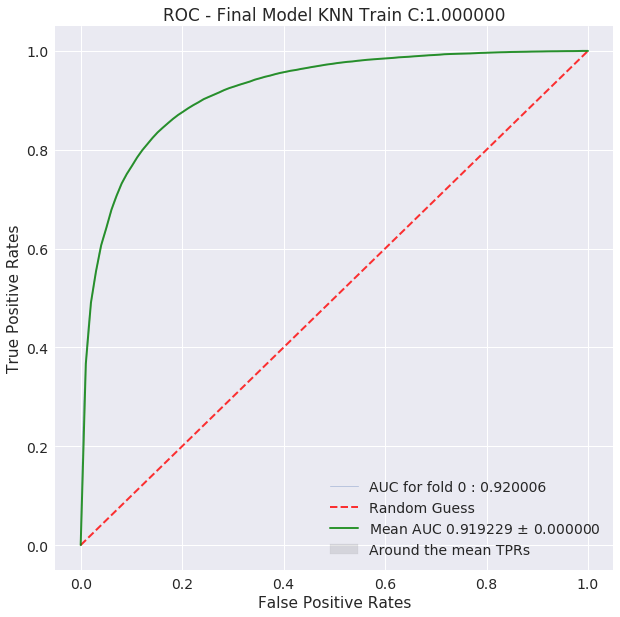

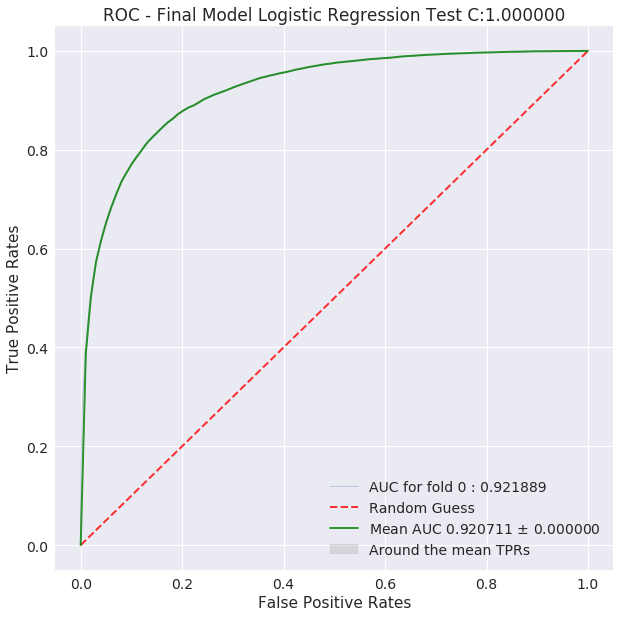

Test auc score  0.9207111104582221


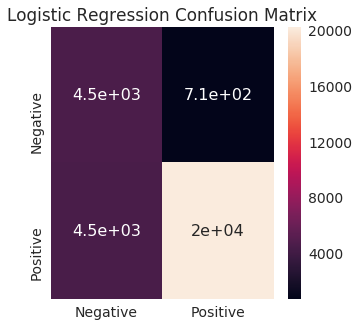

              Negative      Positive
Precision     0.501992      0.966088
Recall        0.864468      0.818252
Fscore        0.635154      0.886045
Support    5246.000000  24754.000000


In [33]:
# read the train, test data and preprocess it
train_features, train_labels, test_features, test_labels = preprocess_data(config_dict,
                                                                            scaling=True,
                                                                            dim_reduction=False)

# train and validate the model
model = train_and_validate_model(config_dict, train_features, train_labels)

# test and evaluate the model
ptabe_entry_c1 = test_and_evaluate_model(model, test_features, test_labels)

### [C.2] Applying Logistic Regression with L2 regularization on AVG W2V,<font color='red'> SET 3</font>

In [34]:
config_dict = {
    'train_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/AVG_W2V/train_avg_w2v.csv',
    'test_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/AVG_W2V/test_avg_w2v.csv',
    'train_size' : 70000,
    'test_size' : 30000,
    'hyperparam_list' : [1.0, 0.1, 0.001, 0.0001],
    'penalty' : 'l2', # l1, l2  
}

Train df shape (69997, 52)
Class label distribution in train df:
 1    35000
0    34997
Name: Label, dtype: int64
Test df shape (30000, 52)
Class label distribution in test df:
 1    24754
0     5246
Name: Label, dtype: int64
Shape of ->  train features :69997,50, test features: 30000,50
Shape of -> train labels :69997, test labels: 30000


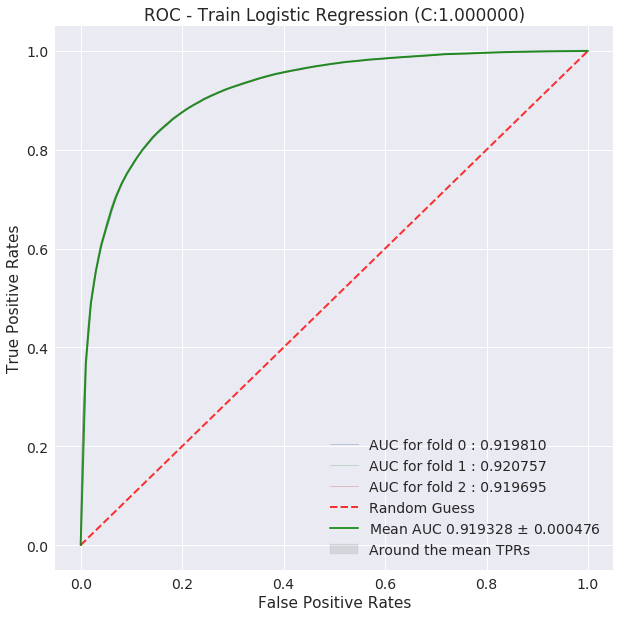

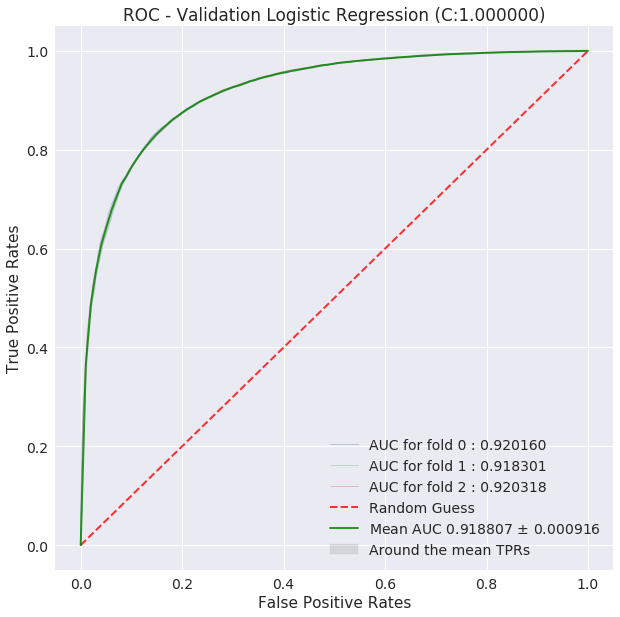

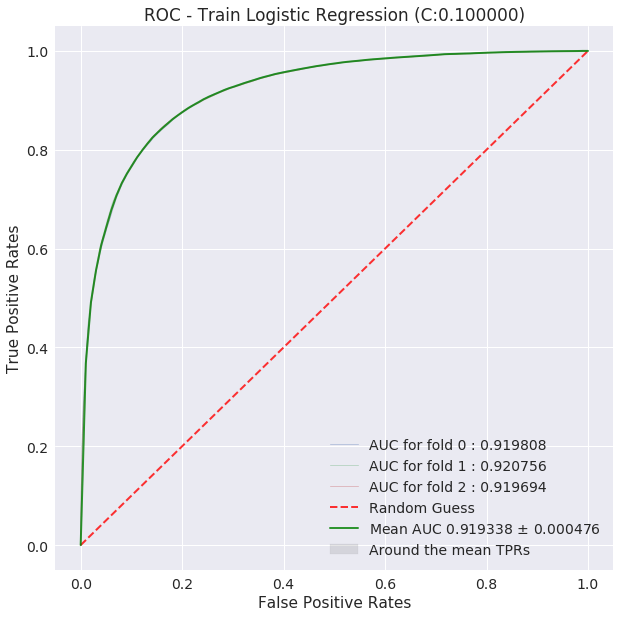

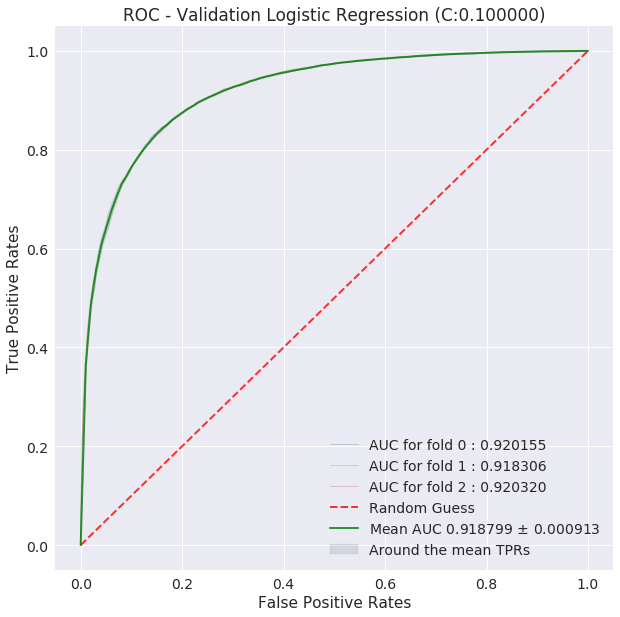

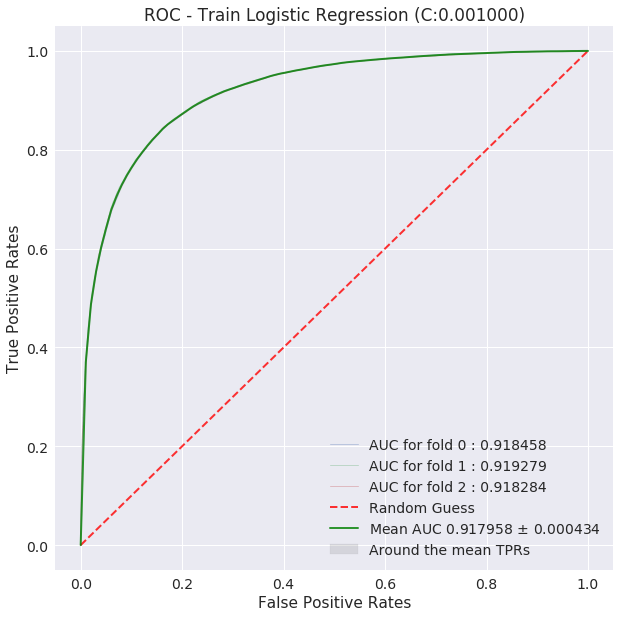

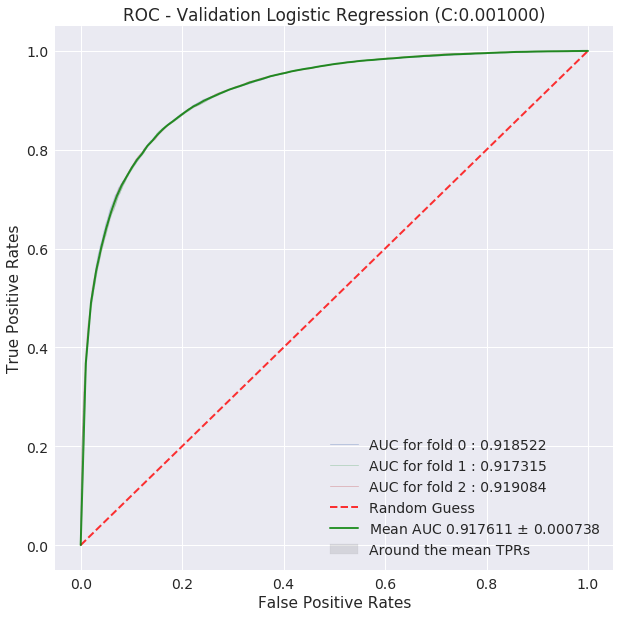

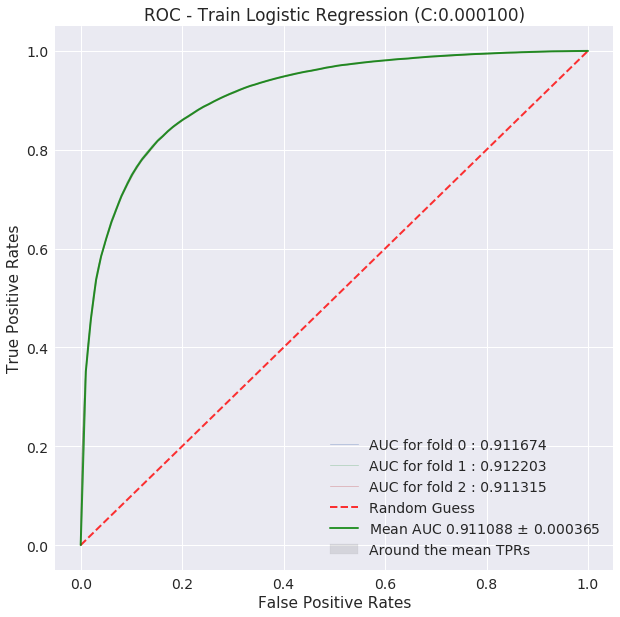

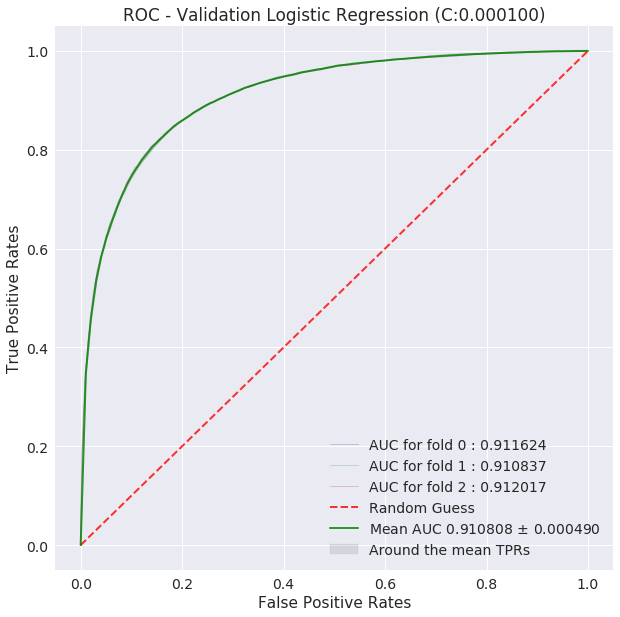

Best hyperparam value:  1.0


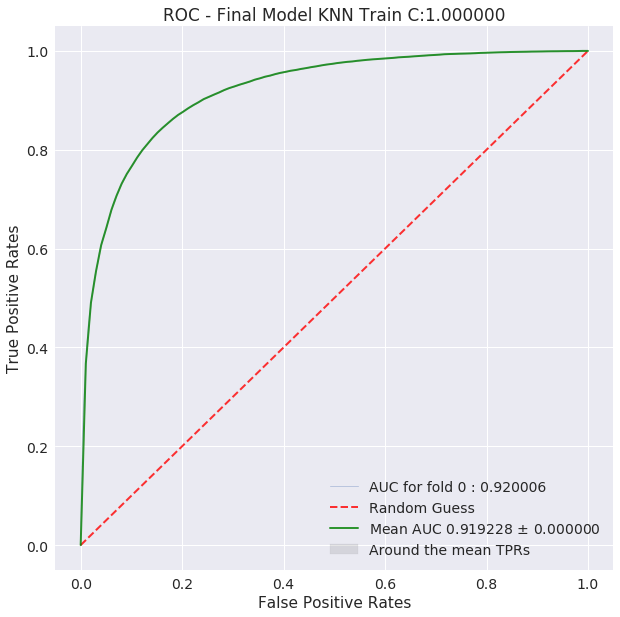

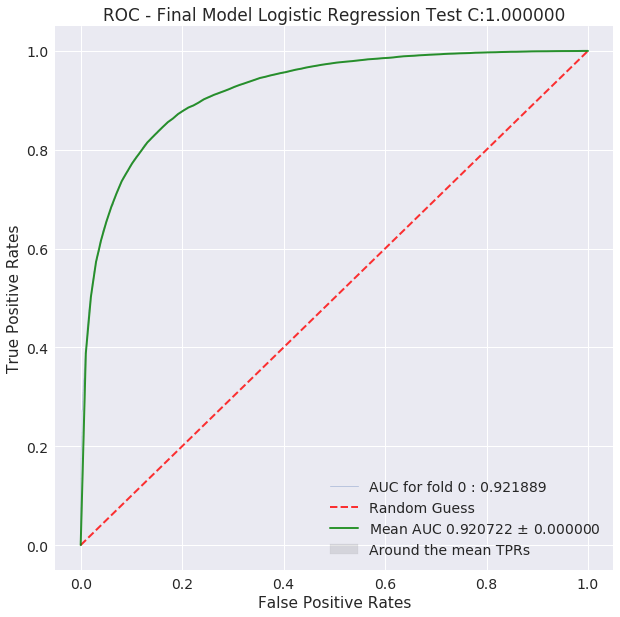

Test auc score  0.9207217199056902


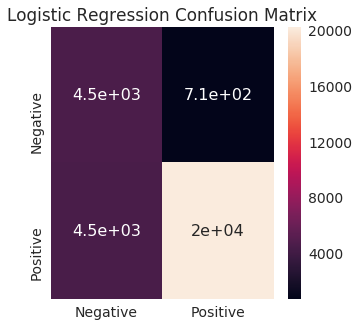

              Negative      Positive
Precision     0.502048      0.966090
Recall        0.864468      0.818292
Fscore        0.635199      0.886070
Support    5246.000000  24754.000000


In [35]:
# read the train, test data and preprocess it
train_features, train_labels, test_features, test_labels = preprocess_data(config_dict,
                                                                            scaling=True,
                                                                            dim_reduction=False)

# train and validate the model
model = train_and_validate_model(config_dict, train_features, train_labels)

# test and evaluate the model
ptabe_entry_c2 = test_and_evaluate_model(model, test_features, test_labels)

## Observation

%%HTML
<ul>
<li> Fo model with L1 regularization model, as the value of C decreases the performace of model is
     almost similar to random guess model (from the ROC plot for C=0.0001)
</ul>

## [D] Logistic Regression on TFIDF W2V,<font color='red'> SET 4</font>

### [D.1] Applying Logistic Regression with L1 regularization on TFIDF W2V,<font color='red'> SET 4</font>

In [36]:
config_dict = {
    'train_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/TFIDF_W2V/train_tf_w2v.csv',
    'test_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/TFIDF_W2V/test_tf_w2v.csv',
    'train_size' : 70000,
    'test_size' : 30000,
    'hyperparam_list' : [1.0, 0.1, 0.001, 0.0001],
    'penalty' : 'l1', # l1, l2   
}

Train df shape (69997, 52)
Class label distribution in train df:
 1    35000
0    34997
Name: Label, dtype: int64
Test df shape (30000, 52)
Class label distribution in test df:
 1    24754
0     5246
Name: Label, dtype: int64
Shape of ->  train features :69997,50, test features: 30000,50
Shape of -> train labels :69997, test labels: 30000


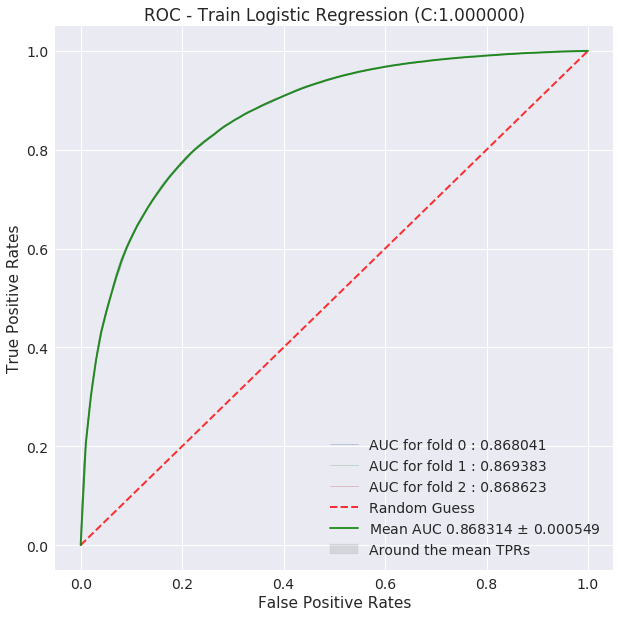

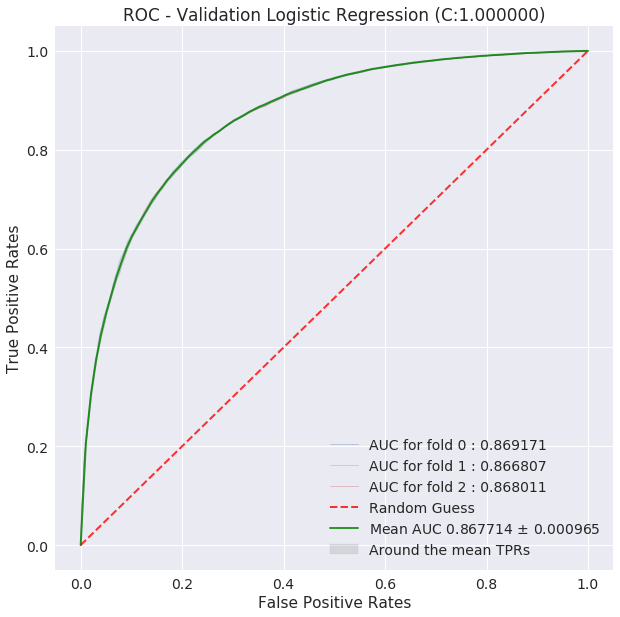

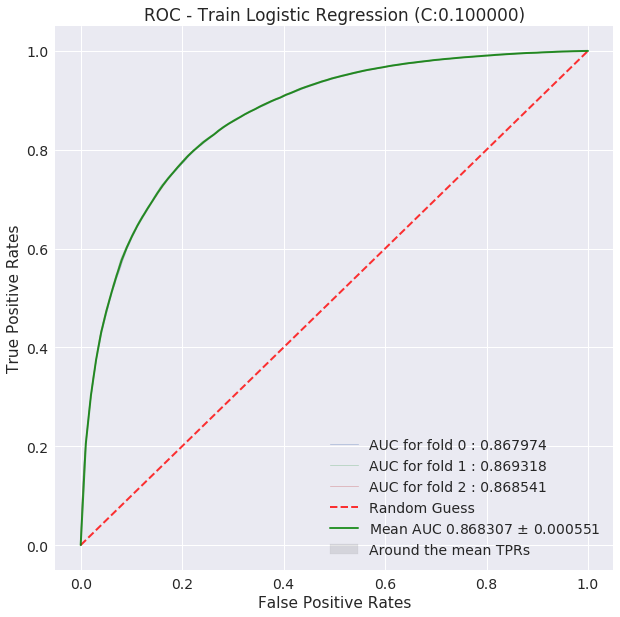

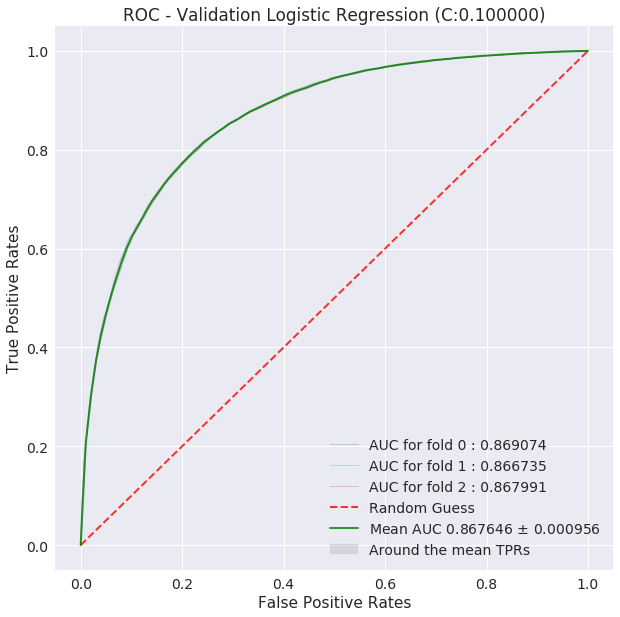

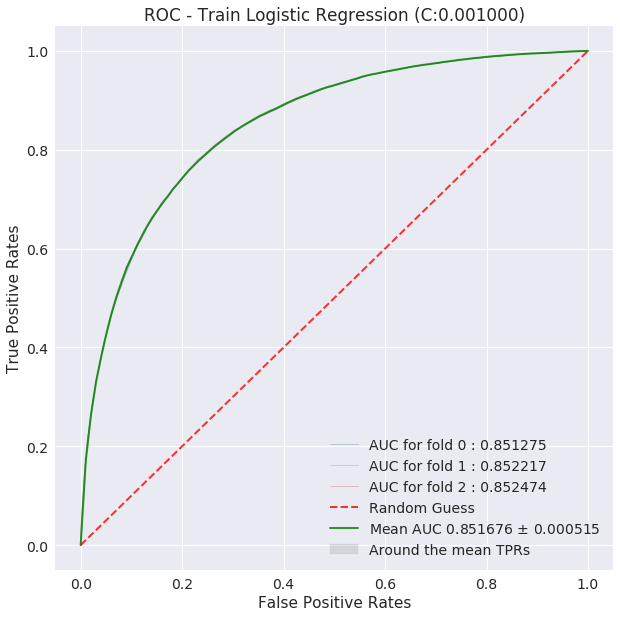

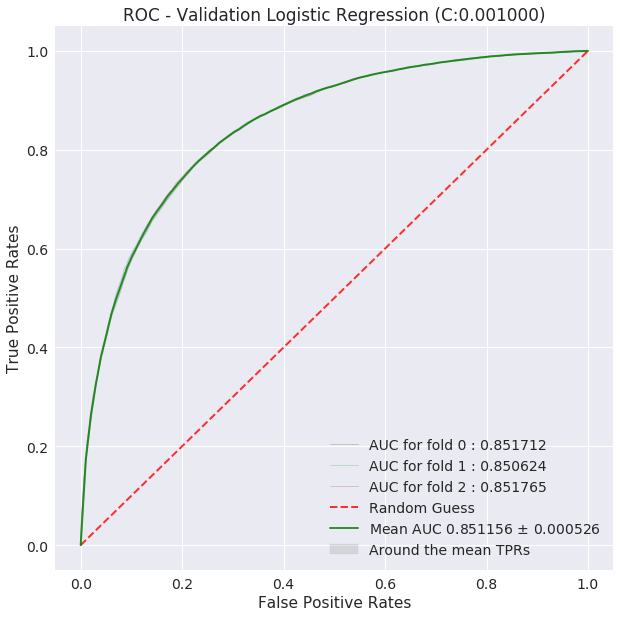

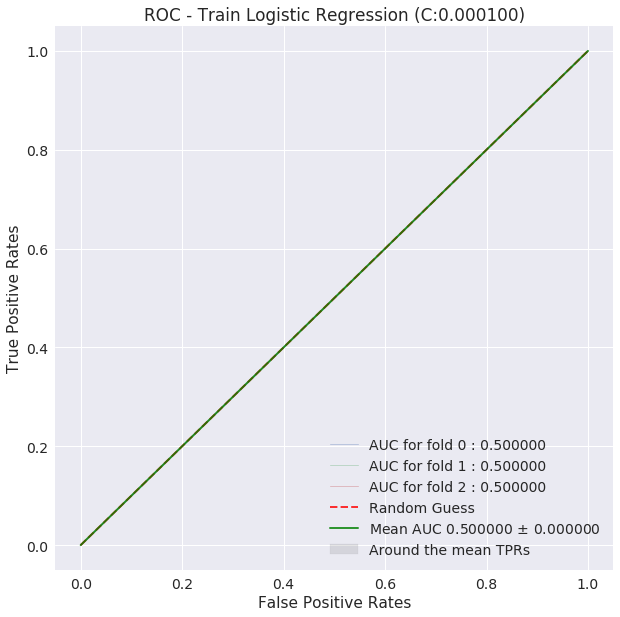

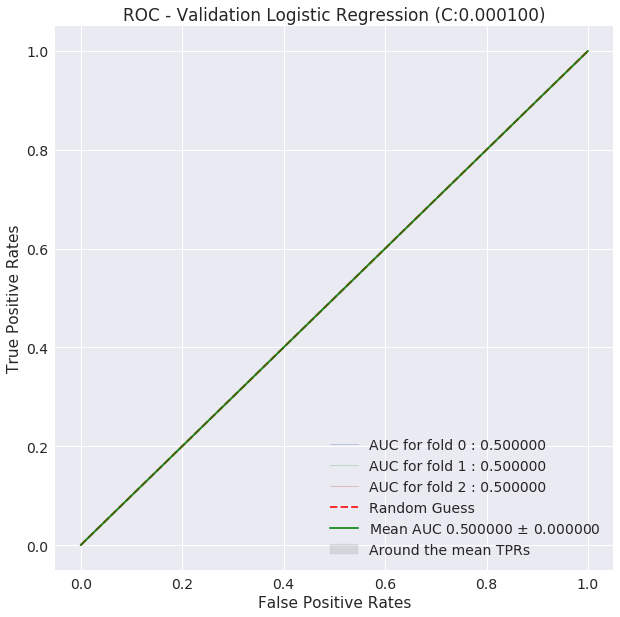

Best hyperparam value:  1.0


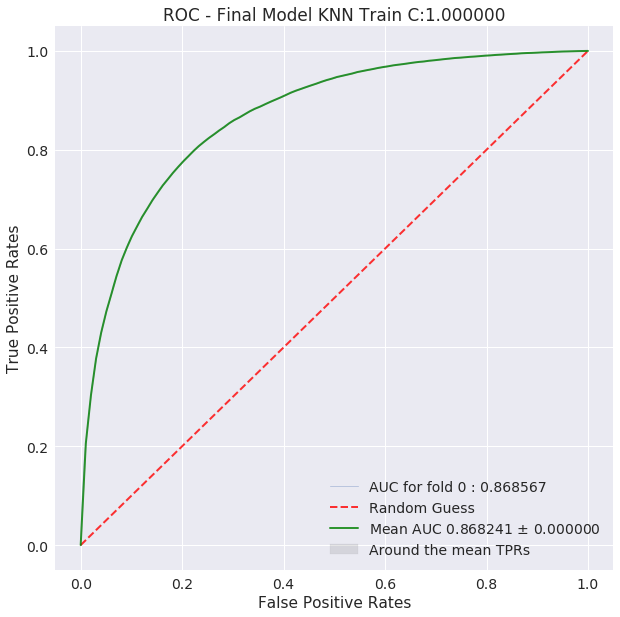

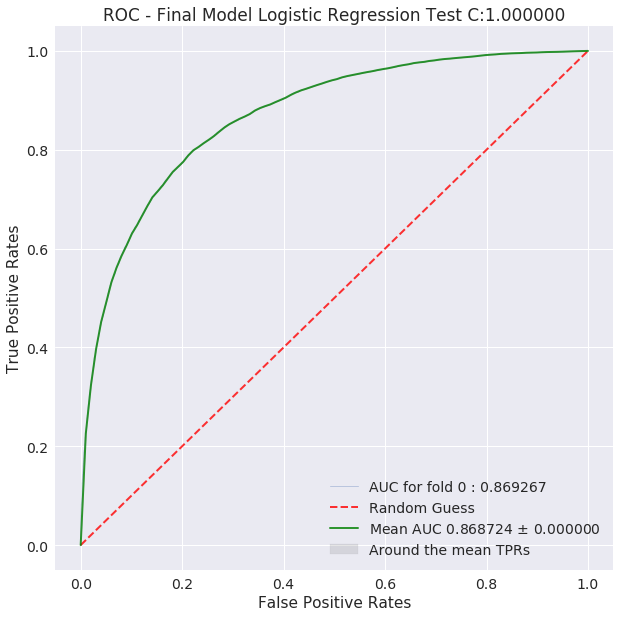

Test auc score  0.8687235936973353


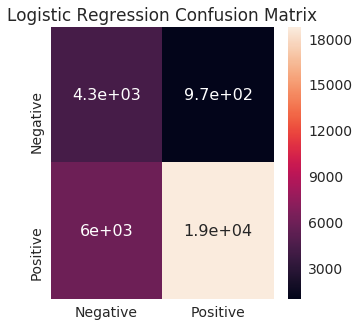

              Negative      Positive
Precision     0.416797      0.950729
Recall        0.814525      0.758463
Fscore        0.551426      0.843782
Support    5246.000000  24754.000000


In [37]:
# read the train, test data and preprocess it
train_features, train_labels, test_features, test_labels = preprocess_data(config_dict,
                                                                            scaling=True,
                                                                            dim_reduction=False)

# train and validate the model
model = train_and_validate_model(config_dict, train_features, train_labels)

# test and evaluate the model
ptabe_entry_d1 = test_and_evaluate_model(model, test_features, test_labels)

### [D.2] Applying Logistic Regression with L2 regularization on TFIDF W2V,<font color='red'> SET 4</font>

In [38]:
config_dict = {
    'train_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/TFIDF_W2V/train_tf_w2v.csv',
    'test_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/TFIDF_W2V/test_tf_w2v.csv',
    'train_size' : 70000,
    'test_size' : 30000,
    'hyperparam_list' : [1.0, 0.1, 0.001, 0.0001],
    'penalty' : 'l2', # l1, l2   
}

Train df shape (69997, 52)
Class label distribution in train df:
 1    35000
0    34997
Name: Label, dtype: int64
Test df shape (30000, 52)
Class label distribution in test df:
 1    24754
0     5246
Name: Label, dtype: int64
Shape of ->  train features :69997,50, test features: 30000,50
Shape of -> train labels :69997, test labels: 30000


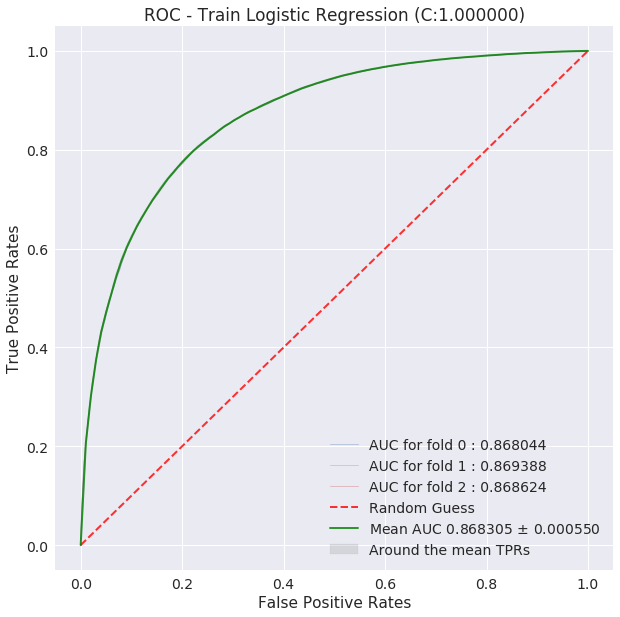

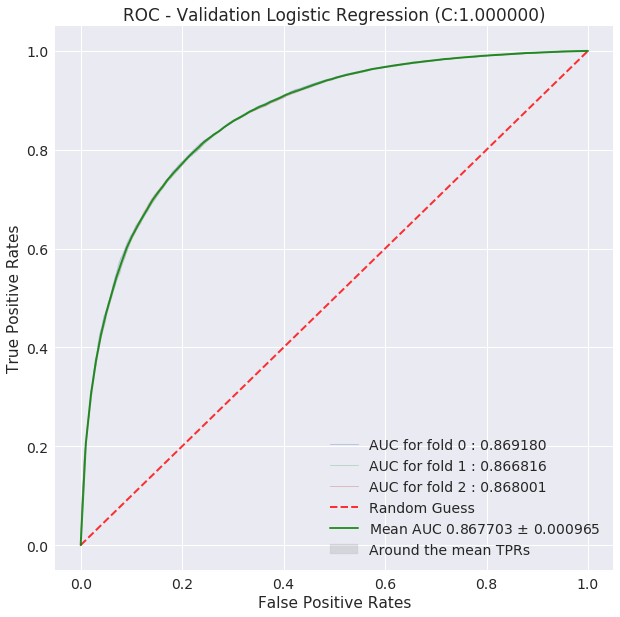

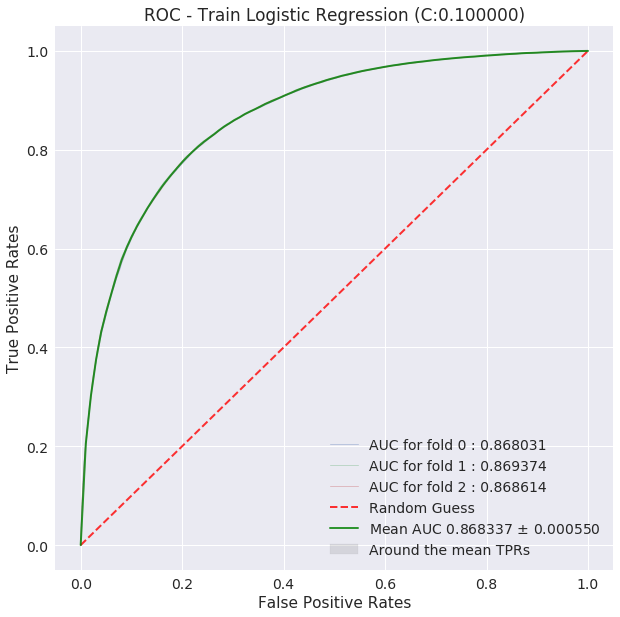

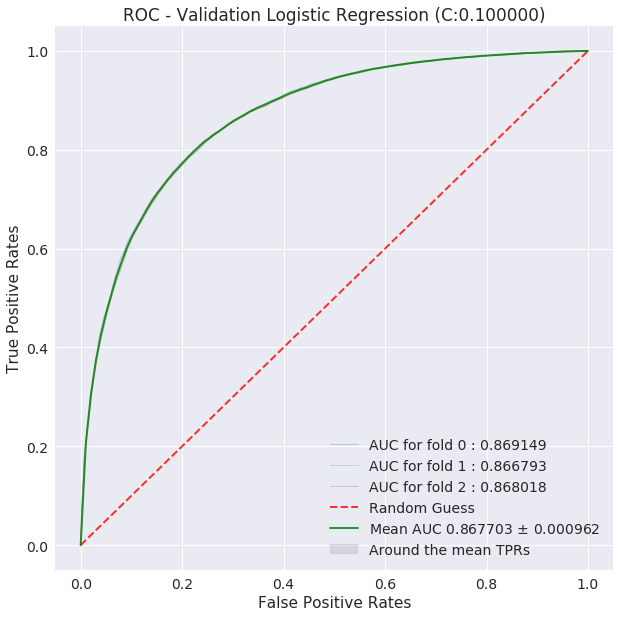

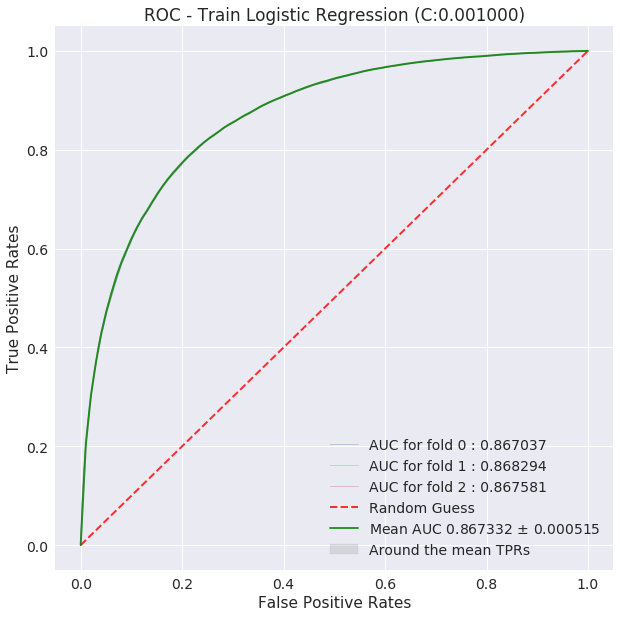

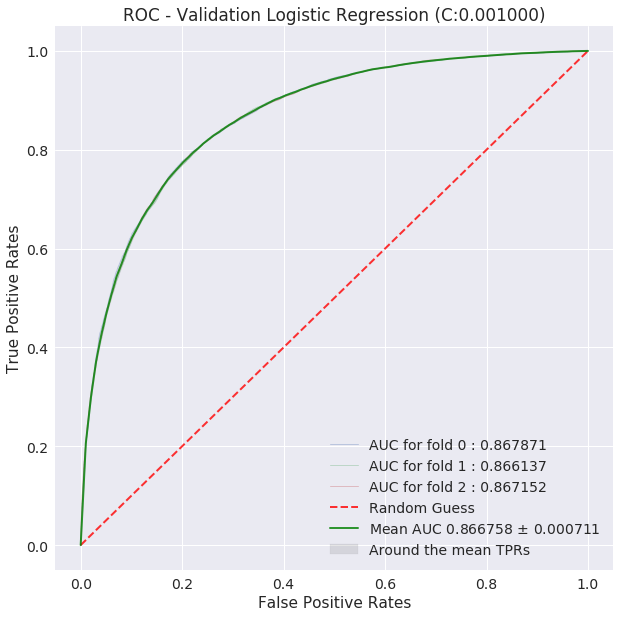

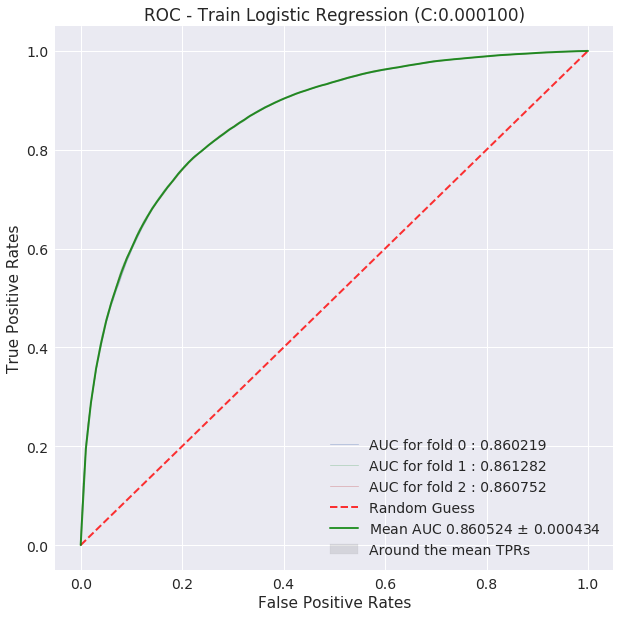

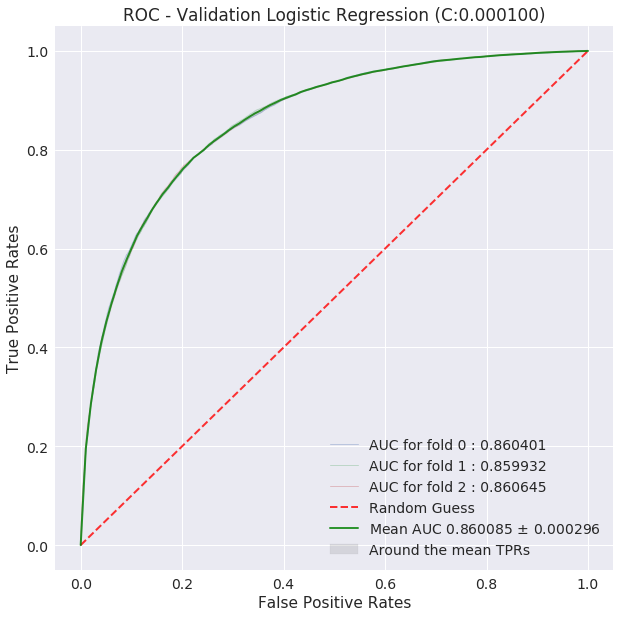

Best hyperparam value:  0.1


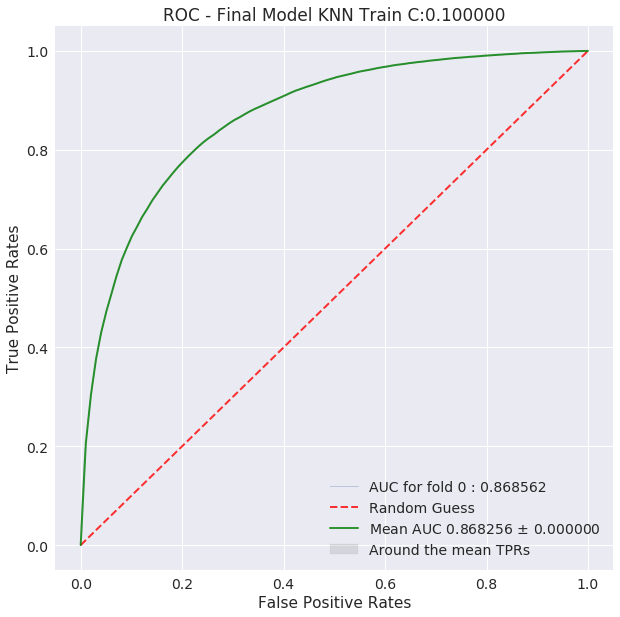

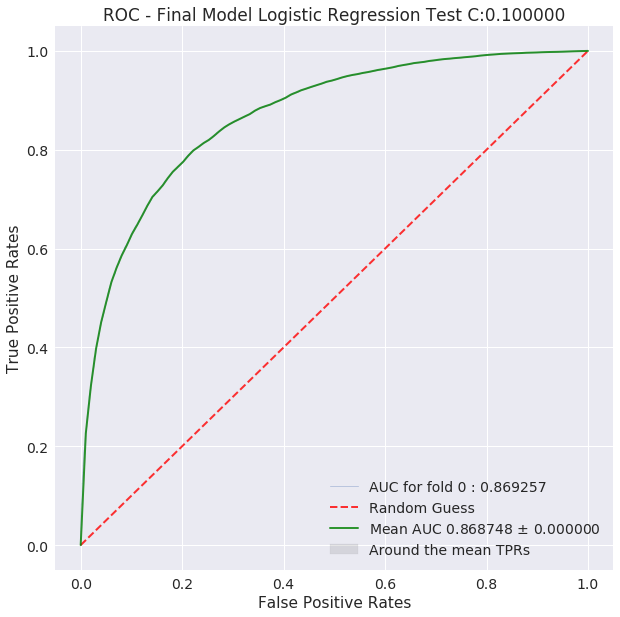

Test auc score  0.8687480770376463


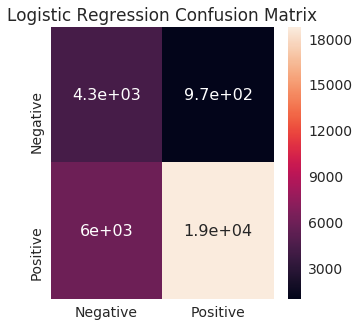

              Negative      Positive
Precision     0.417122      0.950749
Recall        0.814525      0.758786
Fscore        0.551711      0.843990
Support    5246.000000  24754.000000


In [39]:
# read the train, test data and preprocess it
train_features, train_labels, test_features, test_labels = preprocess_data(config_dict,
                                                                            scaling=True,
                                                                            dim_reduction=False)

# train and validate the model
model = train_and_validate_model(config_dict, train_features, train_labels)

# test and evaluate the model
ptabe_entry_d2 = test_and_evaluate_model(model, test_features, test_labels)

## Observation

%%HTML
<ul>
<li> Fo model with L1 regularization model, as the value of C decreases the performace of model is
     almost similar to random guess model (from the ROC plot for C=0.0001)
</ul>

# Procedure Summary

%%HTML
<ol>
<li> Column standardized all the four datasets </li>
<li> Train the model with both L1 & L2 regularizers individually </li>
<li> Find the best hyper parameter C for each of the settings </li>
<li> Identify the sparse features by looking at the zero weights of the model </li>
<li> Do multicolinearity check for identifying whether one feature is a linear combination of others or not </li>
</ol>

# Results Summary

In [40]:
Pret_table = PrettyTable()
Pret_table.field_names = ['Vectorizer', 'Penalty', 'Hyper-Param (C)', 'AUC', 'Fscore (-ve)', 'Fscore (+ve)']
Pret_table.title = 'Logistic Regression Results Summary'

In [41]:
# Brute Force
Pret_table.add_row(['BoW', 'L1'] + ptabe_entry_a1)
Pret_table.add_row(['BoW', 'L2'] + ptabe_entry_a2)
Pret_table.add_row(['TF-IDF', 'L1'] + ptabe_entry_b1)
Pret_table.add_row(['TF-IDF', 'L2'] + ptabe_entry_b2)
# KD Tree
Pret_table.add_row(['Avg W2V', 'L1'] + ptabe_entry_c1)
Pret_table.add_row(['Avg W2V', 'L2'] + ptabe_entry_c2)
Pret_table.add_row(['TF-IDF W2V', 'L1'] + ptabe_entry_d1)
Pret_table.add_row(['TF-IDF W2V', 'L2'] + ptabe_entry_d2)

In [42]:
print(Pret_table)

+-------------------------------------------------------------------------------+
|                      Logistic Regression Results Summary                      |
+------------+---------+-----------------+--------+--------------+--------------+
| Vectorizer | Penalty | Hyper-Param (C) |  AUC   | Fscore (-ve) | Fscore (+ve) |
+------------+---------+-----------------+--------+--------------+--------------+
|    BoW     |    L1   |       0.1       | 0.9252 |   66.6813    |   90.1626    |
|    BoW     |    L2   |      0.001      | 0.9249 |   66.6961    |   90.2283    |
|   TF-IDF   |    L1   |       0.1       | 0.9316 |   66.2616    |   89.8995    |
|   TF-IDF   |    L2   |       1.0       | 0.9315 |   66.2090    |   89.8705    |
|  Avg W2V   |    L1   |       1.0       | 0.9207 |   63.5154    |   88.6045    |
|  Avg W2V   |    L2   |       1.0       | 0.9207 |   63.5199    |   88.6070    |
| TF-IDF W2V |    L1   |       1.0       | 0.8687 |   55.1426    |   84.3782    |
| TF-IDF W2V |  

#  Conclusions

%%HTML
<ul>
<li> The important features given by linear regression has both unigram as well as bi-gram featrues </li>
<li> In multicolinearity check the percentage change for some features are very high and hence those 
     features are likely to be linear combination of others </li>
<li> Bow, Tf-IDF models showed good performance compared to w2v models </li>
<li> F1-score for +ve class is really good (close to 90%) and -ve class it is close to 67% </li>
<li> More complex model can be tried to improve the performance further </li>
</ul>